In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
print(os.getcwd())

NameError: name 'os' is not defined

In [ ]:
"""
TODO
1) check why its only 197 instances instead of full 200, probably because 197 in cell but still weird as it does not do the other 3 cells
"""

In [2]:
import sys
import os
print(os.getcwd())
os.chdir('../../complete_project/../')
print(os.getcwd())
# Then set up the paths
# import sys

# import os
# os.environ['PYTHONPATH'] = os.getcwd()  # Now points to thesis_code directory
# sys.path.append(os.environ['PYTHONPATH'])
sys.path.append("/home/caspar/thesis_code/CellOracle")
sys.path.append("/home/caspar/thesis_code/complete_project/py files")
sys.path.append("/home/caspar/thesis_code/complete_project/py files/AIFiles")
sys.path.append("/home/caspar/thesis_code/complete_project/py files/baseGRNConstructionFiles")
sys.path.append("/home/caspar/thesis_code/complete_project/py files/oracleInferenceFiles")
sys.path.append("/home/caspar/thesis_code/complete_project/py files/oracleSetup")


/home/caspar/thesis_code/complete_project/notebooks
/home/caspar/thesis_code


In [3]:
import psutil

def check_memory(threshold_gb=12):
    process = psutil.Process()
    mem_usage_gb = process.memory_info().rss / (1024 ** 3)  # Convert bytes to GB
    if mem_usage_gb > threshold_gb:
        print(f"Memory usage {mem_usage_gb:.1f}GB exceeds {threshold_gb}GB. Exiting.")
        sys.exit(1)
    print(f"Memory usage: {psutil.Process().memory_info().rss / 1e9} GB")


check_memory(threshold_gb=12)

Memory usage: 0.069005312 GB


In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import anndata
import sys
import logging
from datetime import datetime
import wandb
#import modified_celloracle as mco
from CellOracle import celloracle as co

import CellOracleSetup as setup_module
import GRNClusterAnalysis as analysis_module
import GRNInference as inference_module
import GRNInferenceTest as inference_test_module

log_dir = 'logs'
os.makedirs(log_dir, exist_ok=True)
log_filename = os.path.join(log_dir, f"app_{datetime.now().strftime('%Y_%m_%d')}.log")

# Configure the basic logging
logging.basicConfig(
    filename=log_filename,
    filemode='a',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

In [ ]:
print(f"Memory usage: {psutil.Process().memory_info().rss / 1e9} GB")


In [ ]:
import PickleOracleModel as pickle_module


In [ ]:
import os
import torch.nn as nn
import AI as ai_module # Import the refactored script


data_path_new_data = os.path.join('../celloracle_data', "celloracle_object/new_promoter_without_mescs_trimmed_test_own_umap")
save_path = os.path.join("../celloracle_data", "models")
notebook_config = {
    # Paths
    "ORACLE_PATH": os.path.join(data_path_new_data, "ready_oracle.pkl"),
    "MODEL_SAVE_PATH": os.path.join(save_path, "ppo_version2"), # Unique name
    "LOG_DIR": os.path.join(data_path_new_data, "logs_notebook_exp1"), # Unique logs

    # Training Setup
    "BATCH_SIZE": 256,            # Smaller batch for potentially faster iteration in notebook
    "TOTAL_TIMESTEPS": 500000,   # Short run for testing
    "USE_MASKABLE_PPO": False,    # Explicitly choose (make sure sb3_contrib is installed)
    "VERBOSE": 1,
    "LOG_INTERVAL": 1,
    "RESET_NUM_TIMESTEPS": False,
    "DEVICE": "auto",            # Use GPU if available
    "USE_PROGRESS_BAR": True,    # Show progress in notebook output
    "STEP_SAVE_FREQ":50000,

    # CellOracle Parameters

    # PPO Hyperparameters
    "PPO_N_STEPS": 256,         # Adjust PPO steps,  number of steps before ppo "learns"
    "PPO_N_EPOCHS": 4,
    "GAMMA": 0.99,
    "GAE_LAMBDA": 0.95,
    "CLIP_RANGE": 0.2,
    "ENT_COEF": 0.01,            # Maybe add slight entropy bonus
    "VF_COEF": 0.5,
    "MAX_GRAD_NORM": 0.5,

    # Environment Specific

    "ALLOW_GENE_ACTIVATION": True,
    "STANDARD_SD_FACTOR": 1,
    "USE_LEARNING_RATE_SCHEDULE": True,


    #ENV HYPERPARAMETERS TO TUNE
    "DIVIDER_OF_TOTAL_STEPS_FOR_CURRICULUM_LEARNING":20,#the higher the less steps per phase!
    "TARGET_CELLS_PER_PHASE": 4,
    "MAX_STEPS_PER_EPISODE": 54,
    "GENE_ACTIVITY_THRESHOLD": 0.01,
    "TARGET_DISTANCE_THRESHOLD": 0.1,
    "GAMMA_DISTANCE_DISCOUNTER": 0.99,
    "STEP_PENALTY": -0.07,
    "GOAL_BONUS": 7,
    "FAIL_PENALTY": -1,
    "SAME_CELL_PENALTY": -0.5, #penalty not for same celltype but for same indice, so the action chosen is so bad that the closest neighbor after the action is the same cell
    "DISTANCE_REWARD_SCALE": 5, #the higher the reward, the more we reward/punish getting closer
    "LEARNING_RATE": 3e-4,
    "USE_PREV_KNOCKOUT":True,


    # NN Architecture
    "PI_ARCH": [512,256,216],       # Specify architecture
    "VF_ARCH": [512,256,216],
    "ACTIVATION_FN": nn.ReLU    # Specify activation
}
trained_model = ai_module.run_training(notebook_config)


In [35]:
# In Environment.py (or a test file)
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class MinimalVecEnv(gym.vector.VectorEnv):
    def __init__(self, num_envs=2):
        self.observation_space = spaces.Box(0, 1, (1,))
        self.action_space = spaces.Discrete(2)
        self.num_envs = num_envs
        print("Calling super().__init__")
        # Try both ways:
        # super().__init__(num_envs=self.num_envs, observation_space=obs_space, action_space=act_space)
        print("as;fdknas;jkba")
        super().__init__()
        print("super().__init__ finished")

    # Add dummy implementations for abstract methods
    def reset(self, *, seed=None, options=None): return np.zeros((self.num_envs, 1)), [{"dummy": True}] * self.num_envs
    def step(self, actions): return np.zeros((self.num_envs, 1)), np.zeros(self.num_envs), np.zeros(self.num_envs, dtype=bool), np.zeros(self.num_envs, dtype=bool), [{"dummy": True}] * self.num_envs
    def close(self): pass

try:
    print("Instantiating MinimalVecEnv...")
    test_env = MinimalVecEnv()
    # After initialization
    print(f"num_envs: {test_env.num_envs}")
    print(f"observation_space: {test_env.observation_space}")
    print(f"action_space: {test_env.action_space}")
    test_env.close()
except Exception as e:
    print(f"Error instantiating MinimalVecEnv: {e}")

Instantiating MinimalVecEnv...
Calling super().__init__
as;fdknas;jkba
super().__init__ finished
num_envs: 2
observation_space: Box(0.0, 1.0, (1,), float32)
action_space: Discrete(2)


In [ ]:
def __init__(
        self,
        num_envs: int,
        observation_space: gym.Space,
        action_space: gym.Space,
    ):

In [4]:
 import AI as ai_module
#all custom Data dirs
print(os.getcwd())
Gen_Data_Dir =  '../celloracle_data'
OG_Files_Data_Dir = os.path.join(Gen_Data_Dir, 'og_files')

Base_GRN_Nec_Files_Dir = os.path.join(Gen_Data_Dir, 'files_for_basegrn_creation')
Base_GRN_Dir = os.path.join(Gen_Data_Dir, 'base_grn')
Base_Clustering_Data = os.path.join(Gen_Data_Dir, 'clustering_data')
Final_SCRNA_Data_Dir = os.path.join(Gen_Data_Dir, 'scrna_final_celloc')

#celloracle package dirs
Gen_CellOracle_Package_Dir = '../modified_CellOracle'
Gen_CellOracle_Package_Data_Dir = os.path.join(Gen_CellOracle_Package_Dir, 'modified_celloracle/data')
Gen_CellOracle_Package_Base_GRN_Data_Dir = os.path.join(Gen_CellOracle_Package_Data_Dir, 'promoter_base_GRN')


#celloracleobject dirs
CellOracle_Object_Dir_Spliced = os.path.join(Gen_Data_Dir, 'celloracle_object/spliced')
CellOracle_Object_Dir_Tut = os.path.join(Gen_Data_Dir, 'celloracle_object/tutorial_based')
CellOracle_Object_Dir_Unspliced_Trimmed = os.path.join(Gen_Data_Dir, 'celloracle_object/unspliced_trimmed')
CellOracle_Object_Dir_Unspliced_Untrimmed = os.path.join(Gen_Data_Dir, 'celloracle_object/temp')
CellOracle_Object_Dir_Spliced_Again = os.path.join(Gen_Data_Dir, 'celloracle_object/spliced_again')
CellOracle_Object_Dir_New = os.path.join(Gen_Data_Dir, 'celloracle_object/finalized_model')
CellOracle_Object_Dir_W_MESC = os.path.join(Gen_Data_Dir, 'celloracle_object/new_promoter_without_mescs_trimmed')
#check if all paths exists
path_list = [Gen_Data_Dir, OG_Files_Data_Dir, Base_GRN_Nec_Files_Dir, Base_GRN_Dir, Base_Clustering_Data, Final_SCRNA_Data_Dir, Gen_CellOracle_Package_Dir, Gen_CellOracle_Package_Data_Dir, Gen_CellOracle_Package_Base_GRN_Data_Dir, CellOracle_Object_Dir_Spliced, CellOracle_Object_Dir_Tut, CellOracle_Object_Dir_Unspliced_Trimmed, CellOracle_Object_Dir_Unspliced_Untrimmed, CellOracle_Object_Dir_Spliced_Again,CellOracle_Object_Dir_W_MESC]
for path in path_list:
    print(f"Does {path} exist: {os.path.exists(path)}")

/home/caspar/thesis_code
Does ../celloracle_data exist: True
Does ../celloracle_data/og_files exist: True
Does ../celloracle_data/files_for_basegrn_creation exist: True
Does ../celloracle_data/base_grn exist: True
Does ../celloracle_data/clustering_data exist: True
Does ../celloracle_data/scrna_final_celloc exist: True
Does ../modified_CellOracle exist: True
Does ../modified_CellOracle/modified_celloracle/data exist: True
Does ../modified_CellOracle/modified_celloracle/data/promoter_base_GRN exist: True
Does ../celloracle_data/celloracle_object/spliced exist: True
Does ../celloracle_data/celloracle_object/tutorial_based exist: True
Does ../celloracle_data/celloracle_object/unspliced_trimmed exist: True
Does ../celloracle_data/celloracle_object/temp exist: False
Does ../celloracle_data/celloracle_object/spliced_again exist: True
Does ../celloracle_data/celloracle_object/new_promoter_without_mescs_trimmed exist: True


In [5]:
trained_cellOc_object = co.load_hdf5(os.path.join(CellOracle_Object_Dir_New, "cellOC.celloracle.oracle"))
trained_links_object = co.load_hdf5(os.path.join(CellOracle_Object_Dir_New, "filtered_links.celloracle.links"))


In [11]:
print(f"Memory usage: {psutil.Process().memory_info().rss / 1e9} GB")


Memory usage: 0.517967872 GB


In [5]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#p=0.01 = 24448
#p=0.001 = 2445
# analysis_module.Analysis(cellOc_object=trained_cellOc_object, link_object=trained_links_object, plot_dir= os.path.join(Gen_Data_Dir, 'plots'))

In [15]:
pdframe = pd.read_csv(os.path.join(Base_GRN_Nec_Files_Dir, 'promoter_to_tf_list.csv'),sep=';')
print(pdframe.head())


  seqnames\tstart\tend\twidth\tstrand\tname\tscore\tTF_inSwissRegulon\tGimmeMotifs_score
0  3\t108143147\t108148146\t5000\t*\tP_1:Gnai3:1\...                                    
1  X\t77850577\t77855576\t5000\t*\tP_2:Pbsn:1\t0\...                                    
2  16\t18808790\t18813789\t5000\t*\tP_3:Cdc45:1\t...                                    
3  7\t142574341\t142579340\t5000\t*\tP_4:H19:1\t0...                                    
4  X\t161080525\t161085524\t5000\t*\tP_5:Scml2:1\...                                    


In [7]:
# inference_test =  inference_test_module.InferenceTest(oracle_path=os.path.join(CellOracle_Object_Dir_W_MESC, "fit_cellOC.celloracle.oracle"), links_path=os.path.join(CellOracle_Object_Dir_W_MESC, "filtered_links.celloracle.links"),fit_for_grn_sim=False)
inference_test =  inference_test_module.InferenceTest(oracle_path=os.path.join(CellOracle_Object_Dir_New, "GRN_trained.celloracle.oracle"), links_path=os.path.join(CellOracle_Object_Dir_New, "filtered_links.celloracle.links"),fit_for_grn_sim=False)
inference_test.test_init()


Loading links
Loading oracle
Oracle loaded
Cluster specific TF dict loaded
Oracle object

Meta data
    celloracle version used for instantiation: 0.19.0
    n_cells: 30000
    n_genes: 3000
    cluster_name: celltype
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 44608 genes
    n_regulatory_in_TFdict: 474 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 110 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 3000 genes
    k_for_knn_imputation: 750
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Done



In [6]:
inference_test_ =  inference_test_module.InferenceTest(oracle_path=os.path.join(CellOracle_Object_Dir_W_MESC, "fit_cellOC.celloracle.oracle"), links_path=os.path.join(CellOracle_Object_Dir_W_MESC, "filtered_links.celloracle.links"),fit_for_grn_sim=False)
inference_test_.test_init()


Loading links
Loading oracle
Oracle loaded
Cluster specific TF dict loaded
Oracle object

Meta data
    celloracle version used for instantiation: 0.19.0
    n_cells: 30000
    n_genes: 3000
    cluster_name: celltype
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 40674 genes
    n_regulatory_in_TFdict: 470 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 108 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 2988 genes
    k_for_knn_imputation: 750
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Done

Testing init
creating class variables!!!


Testing init
creating class variables!!!


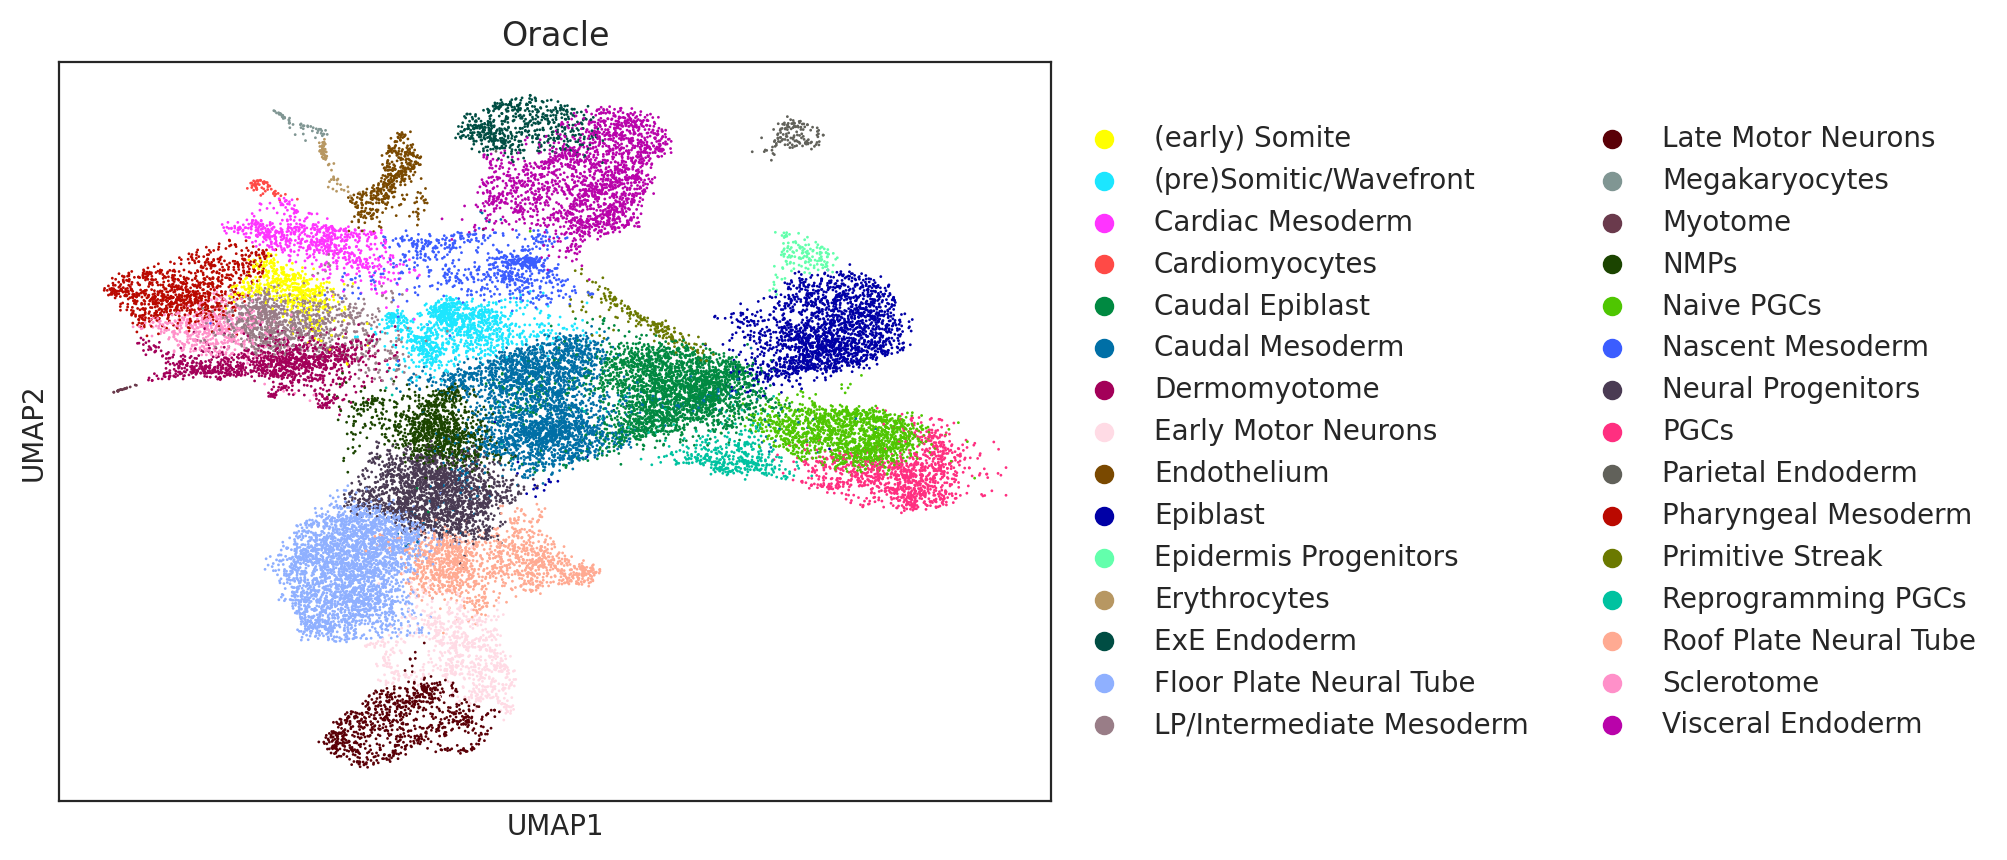

KeyError: 'imputed_count'

In [11]:
inference_test_.set_different_adata()

In [10]:
inference_test_.compare_multiple_cellocs(oracle_path=os.path.join(CellOracle_Object_Dir_New, "GRN_trained.celloracle.oracle"), links_path=os.path.join(CellOracle_Object_Dir_New, "filtered_links.celloracle.links"),batch_size=64)

creating class variables!!!
[235, 14847, 27478, 20289, 10085, 589, 2701, 18198, 15173, 27210, 24979, 9368, 20625, 7881, 24367, 22043, 11414, 28799, 1217, 976, 12730, 8456, 16953, 19397, 264, 664, 18646, 16422, 18813, 21970, 5391, 4902, 26646, 4706, 17465, 3199, 9393, 12592, 6215, 6467, 25114, 15506, 3710, 14273, 514, 17300, 11663, 10742, 7971, 2975, 17183, 2580, 24837, 19742, 4381, 3348, 12124, 7039, 12033, 22210, 24691, 8077, 1458, 27156]
[4023, 26649, 12209, 1093, 10553, 14679, 20374, 812, 19982, 17165, 24344, 5189, 8554, 2487, 20877, 18239, 24955, 947, 2123, 12172, 7735, 29976, 17214, 4775, 20966, 25339, 19502, 21390, 23190, 9488, 28255, 27691, 23136, 28877, 21259, 6923, 15044, 9696, 13344, 25850, 27785, 27035, 23422, 16792, 29809, 24491, 22765, 25445, 1691, 6682, 9852, 6576, 29433, 24526, 19905, 1964, 4694, 8271, 12293, 22052, 29264, 12275, 1520, 18633]


ValueError: umap_neighbors is missing. Cannot compute nearest neighbor.

perturbing:  64
['Gastd7-rep3-H3K4me3-3:ATCGACGA' 'Gastd3-rep3-H3K4me3-3:GCAATCGA'
 'Gastd4-rep3-H3K27me3-4:GACAAACC' 'Gastd6-rep2-H3K27me3-4:GTTGGTGA'
 'Gastd5-rep3-H3K27me3-6:TGCGGTAT' 'Gastd3-rep3-H3K27me3-3:CGCAAAGT'
 'Gastd3-rep3-H3K4me3-6:GTAATCCG' 'Gastd5-rep2-H3K4me3-2:ACAGAAGC'
 'Gastd6-rep2-H3K4me3-6:CGAACTGT' 'Gastd6-rep3-H3K4me3-1:ACAGAAGC'
 'Gastd5-rep4-H3K27me3-3:ATCGTGCA' 'Gastd5-rep4-H3K27me3-4:AACACGCA'
 'Gastd5-rep2-H3K27me3-2:AACGAGGT' 'Gastd5-rep3-H3K4me3-1:CGTAATCG'
 'Gastd5-rep2-H3K27me3-6:TTGTCCAC' 'Gastd4-rep4-H3K27me3-5:CGAACTGT'
 'Gastd7-rep3-H3K27me3-6:GGACGAAT' 'Gastd5-rep2-H3K4me3-5:GCTGTAAC'
 'Gastd3-rep3-H3K27me3-4:CAAGAGAC' 'Gastd6-rep3-H3K4me3-3:GTAGTGAG'
 'Gastd6-rep2-H3K27me3-6:CATCTCAC' 'Gastd3-rep3-H3K27me3-2:TAGTTGCG'
 'Gastd5-rep2-H3K27me3-5:GTCTCACA' 'Gastd4-rep3-H3K4me3-1:GAGAACGA'
 'Gastd4-rep4-H3K27me3-6:GTGCGTAT' 'Gastd4-rep3-H3K27me3-4:AGCTTCAC'
 'Gastd5-rep2-H3K27me3-6:TGGCTTCA' 'Gastd7-rep2-H3K4me3-1:AGGCTAAC'
 'Gastd4-rep4-H3K27me3-2:CCTG

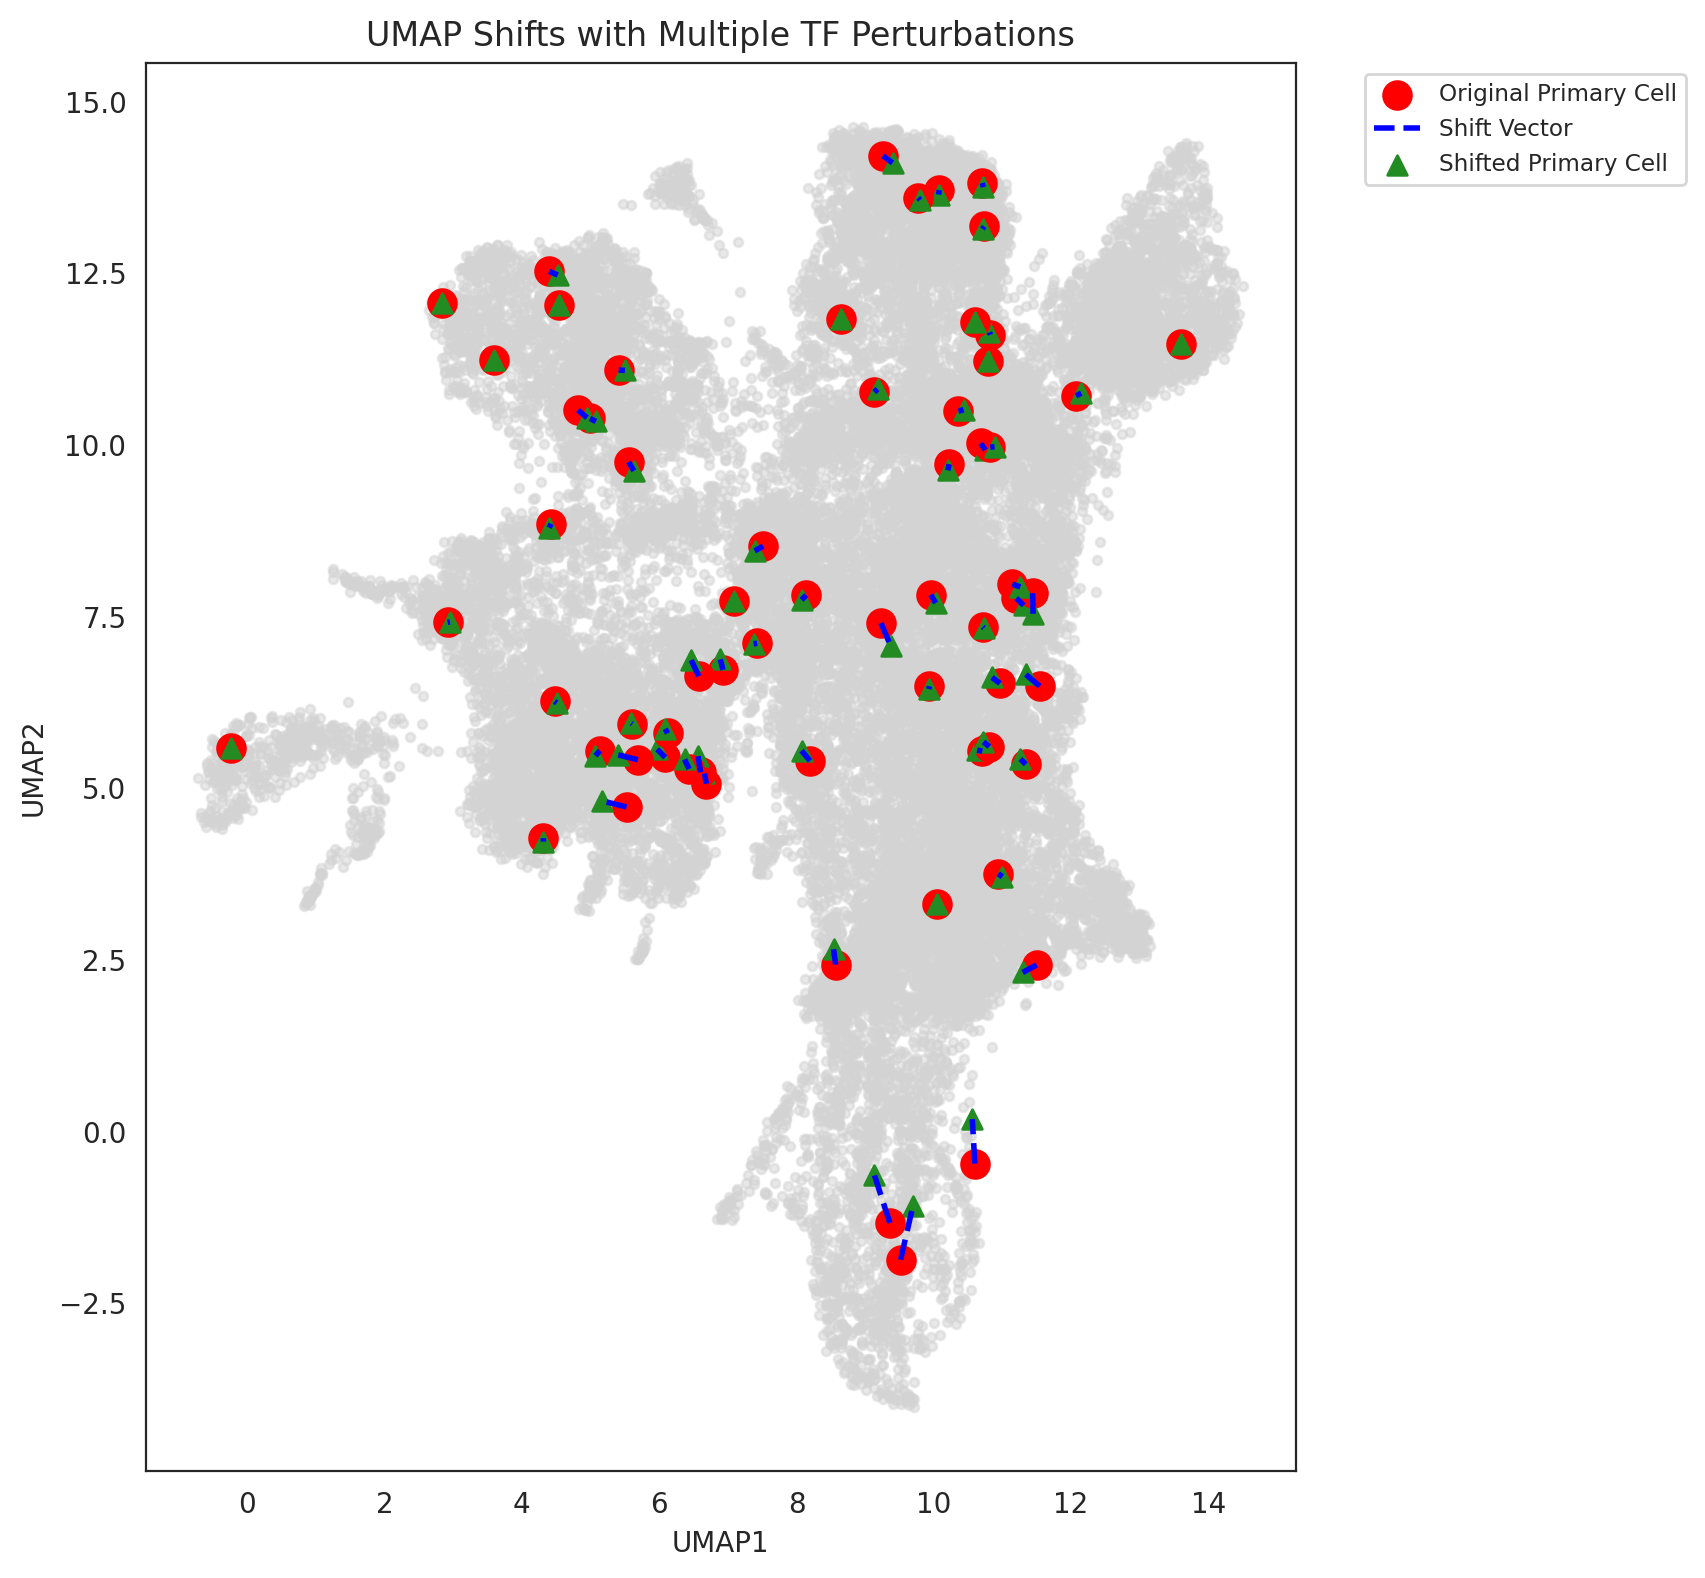

perturbing:  64
['Gastd3-rep3-H3K4me3-2:ACGCGTAA' 'Gastd5-rep2-H3K4me3-6:TACTGCAC'
 'Gastd5-rep3-H3K4me3-5:ATCGACGA' 'Gastd5-rep3-H3K4me3-5:GTCTACCT'
 'Gastd6-rep2-H3K4me3-4:TTCCCTCA' 'Gastd5-rep4-H3K27me3-3:GTCTTACC'
 'Gastd7-rep2-H3K27me3-1:GTTGCCAC' 'Gastd6-rep3-H3K27me3-6:TATGGAGC'
 'Gastd7-rep2-H3K4me3-3:CAGATACC' 'Gastd3-rep3-H3K4me3-5:GGACTACT'
 'Gastd5-rep3-H3K4me3-5:GGATTGAC' 'Gastd3-rep3-H3K27me3-6:ATCGACGA'
 'Gastd5-rep2-H3K4me3-6:GAAAGGTG' 'Gastd5-rep2-H3K4me3-3:ATGCTCTG'
 'Gastd5-rep2-H3K27me3-4:TATCCTGC' 'Gastd4-rep3-H3K4me3-7:ATGGGCTT'
 'Gastd3-rep3-H3K27me3-6:GGCGATTT' 'Gastd6-rep3-H3K27me3-4:GTGCGTAT'
 'Gastd6-rep3-H3K4me3-4:GGGTAAGA' 'Gastd6-rep2-H3K4me3-5:AAGCACAT'
 'Gastd7-rep3-H3K27me3-2:AGGAGACT' 'Gastd4-rep3-H3K27me3-6:ACACCGTG'
 'Gastd4-rep3-H3K4me3-3:CGCTTGCT' 'Gastd4-rep3-H3K4me3-3:ATGAGCAG'
 'Gastd4-rep3-H3K4me3-9:GAGAAGAG' 'Gastd7-rep2-H3K27me3-4:ACAGGCAT'
 'Gastd5-rep3-H3K4me3-5:CTCTGCTA' 'Gastd6-rep2-H3K4me3-5:AGCTTCAC'
 'Gastd7-rep2-H3K4me3-4:CACCATGT' 'G

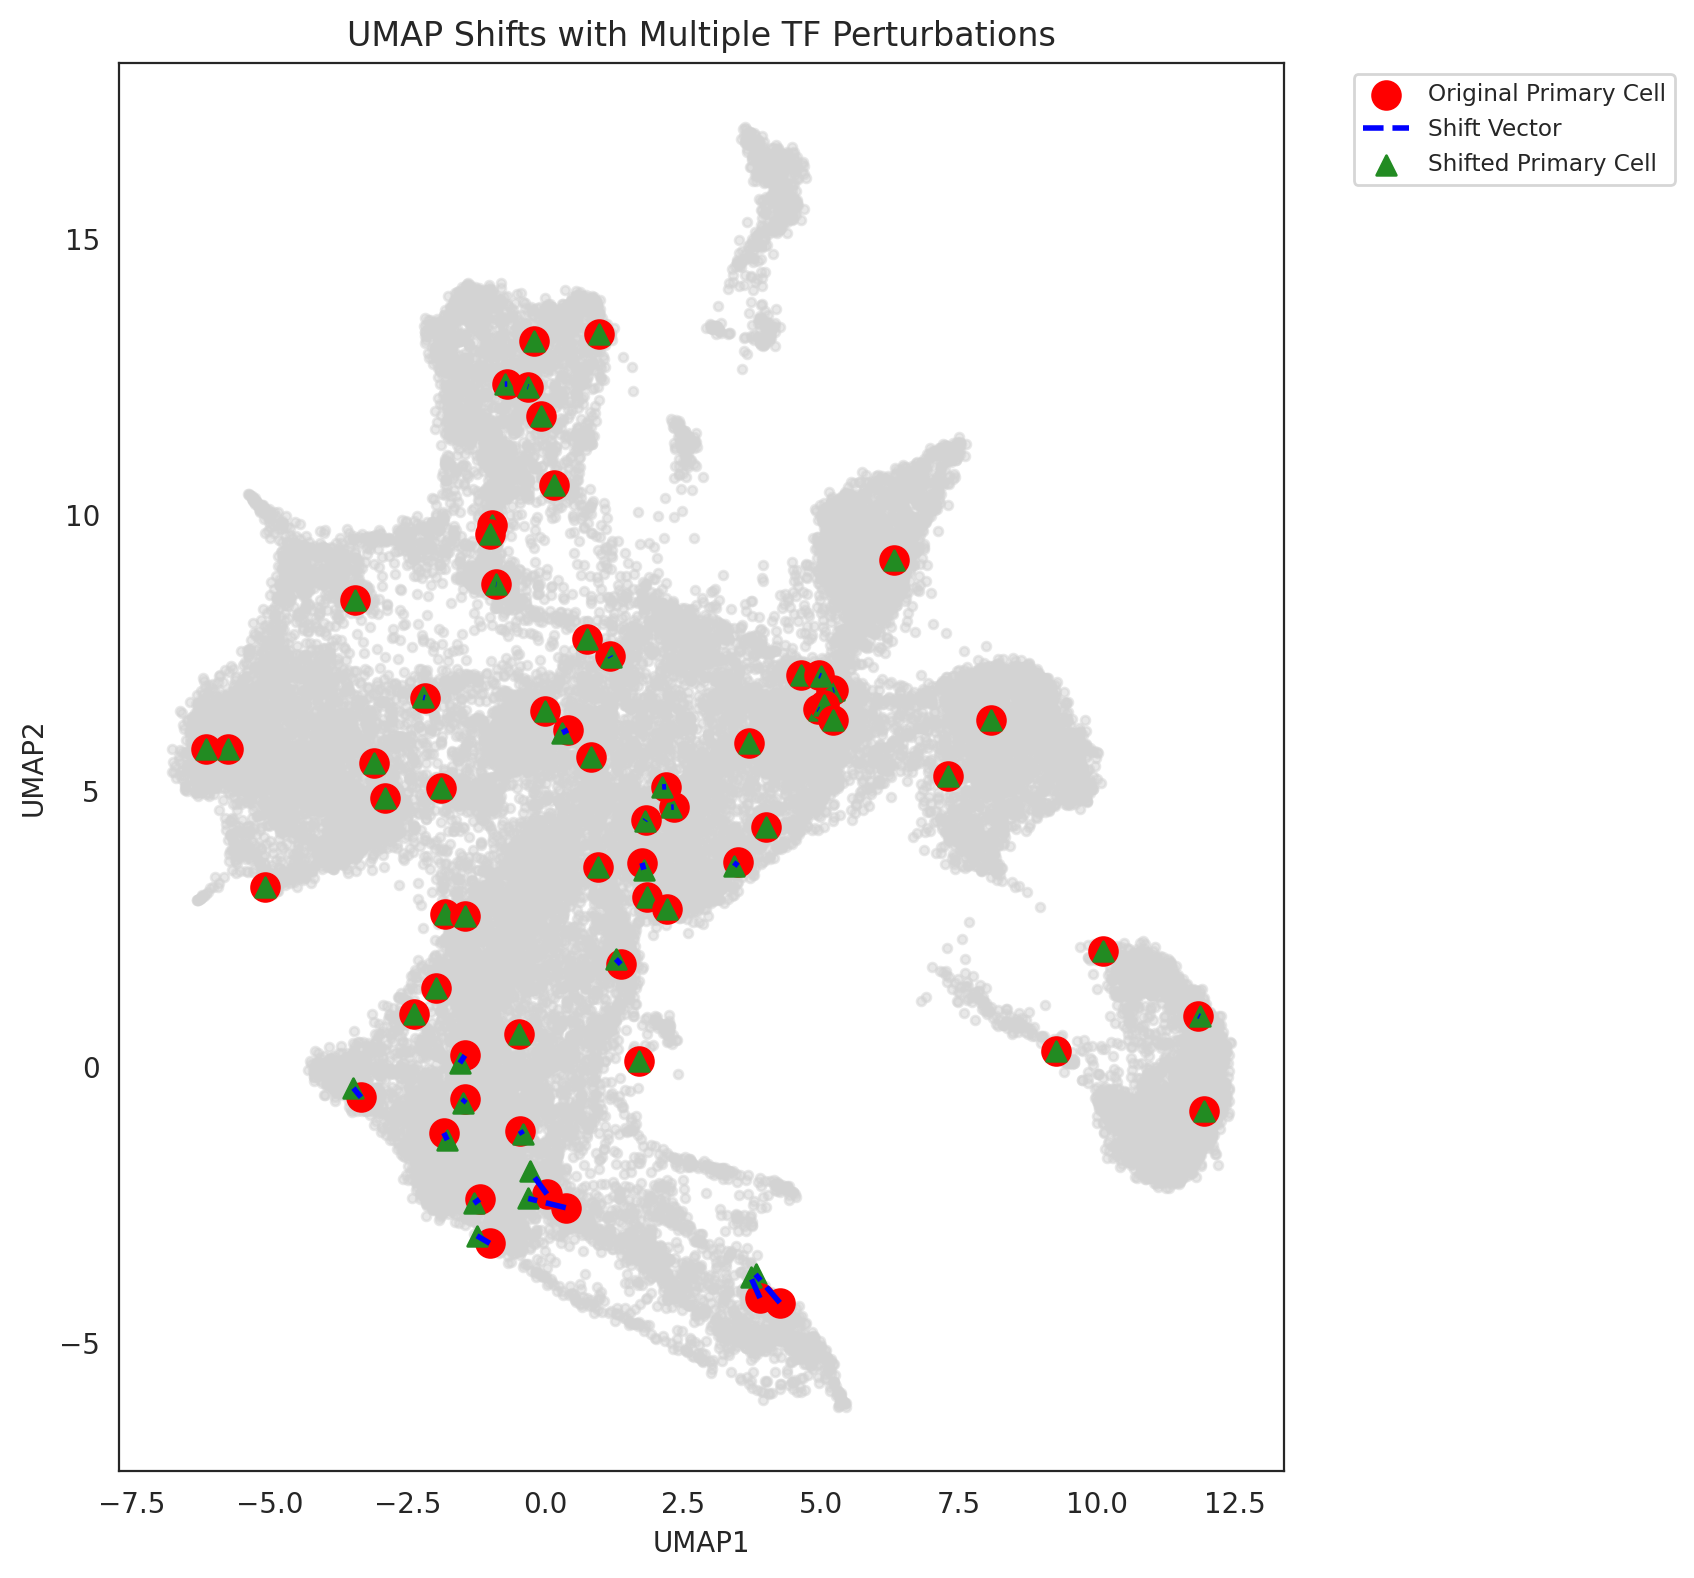

single batgch


In [40]:
# index: 11982 with celltype:  Visceral Endoderm  has shifted coords:  [-1.7343106 14.679304 ]  with tf:  Nfib  with delta shift:  [0.01274832 0.05369447]
# index: 10611 with celltype:  Roof Plate Neural Tube  has shifted coords:  [2.5357683 1.4986788]  with tf:  Prdm1  with delta shift:  [0.41148722 0.24408314]
# index: 4943 with celltype:  Nascent Mesoderm  has shifted coords:  [-4.713761 12.375287]  with tf:  Klf12  with delta shift:  [-0.29571683  0.55746359]
# index: 12937 with celltype:  Caudal Epiblast  has shifted coords:  [3.3097405 8.033362 ]  with tf:  Rxra  with delta shift:  [-0.18582426  0.64550391]
# index: 21329 with celltype:  Caudal Epiblast  has shifted coords:  [3.8274374 8.733731 ]  with tf:  Elk3  with delta shift:  [0.06150758 0.17500183]
# index: 1582 with celltype:  LP/Intermediate Mesoderm  has shifted coords:  [-5.9451385 10.564219 ]  with tf:  Fli1  with delta shift:  [0.22466162 0.74758478]
# index: 2373 with celltype:  Floor Plate Neural Tube  has shifted coords:  [-2.4980602 -2.5912237]  with tf:  Etv1  with delta shift:  [0.14588847 0.34453271]
# index: 26911 with celltype:  PGCs  has shifted coords:  [7.9485545 5.8970675]  with tf:  Etv1  with delta shift:  [0.03203999 0.00203755]
# index: 17559 with celltype:  Epiblast  has shifted coords:  [ 6.6979485 11.176796 ]  with tf:  Etv1  with delta shift:  [0.33306786 0.05417211]
# index: 3084 with celltype:  Roof Plate Neural Tube  has shifted coords:  [-2.3083045  0.668055 ]  with tf:  Etv1  with delta shift:  [-0.25290507 -0.009123  ]
# index: 19096 with celltype:  Caudal Mesoderm  has shifted coords:  [0.2466633 6.979875 ]  with tf:  Etv6  with delta shift:  [0.16596369 0.09066991]
# index: 1900 with celltype:  Sclerotome  has shifted coords:  [-6.328203  6.434008]  with tf:  Elf1  with delta shift:  [ 0.61566845 -0.24943363]
# index: 29809 with celltype:  Neural Progenitors  has shifted coords:  [-0.10570186  1.9832631 ]  with tf:  Smad3  with delta shift:  [0.09459535 0.4679353 ]
# index: 16627 with celltype:  ExE Endoderm  has shifted coords:  [-2.5327241 15.215843 ]  with tf:  Pgr  with delta shift:  [-0.15507466  0.22557228]
# index: 7035 with celltype:  mESCs  has shifted coords:  [13.194077   3.4983056]  with tf:  E2f3  with delta shift:  [-0.23249071  0.50922669]
# index: 1228 with celltype:  Caudal Epiblast  has shifted coords:  [6.3100314 9.655213 ]  with tf:  Foxp1  with delta shift:  [ 0.55519266 -0.07350344]
#0.3 0.26 vs -0.3 0.6
# 12.69, 4.09


inference_test_.batch_perturbation(use_index_choice = True)
inference_test.batch_perturbation(use_index_choice = True)
print("single batgch")
#inference_test.batch_perturbation_sin()

perturbing:  3
operation took:  0:00:02.705639  seconds


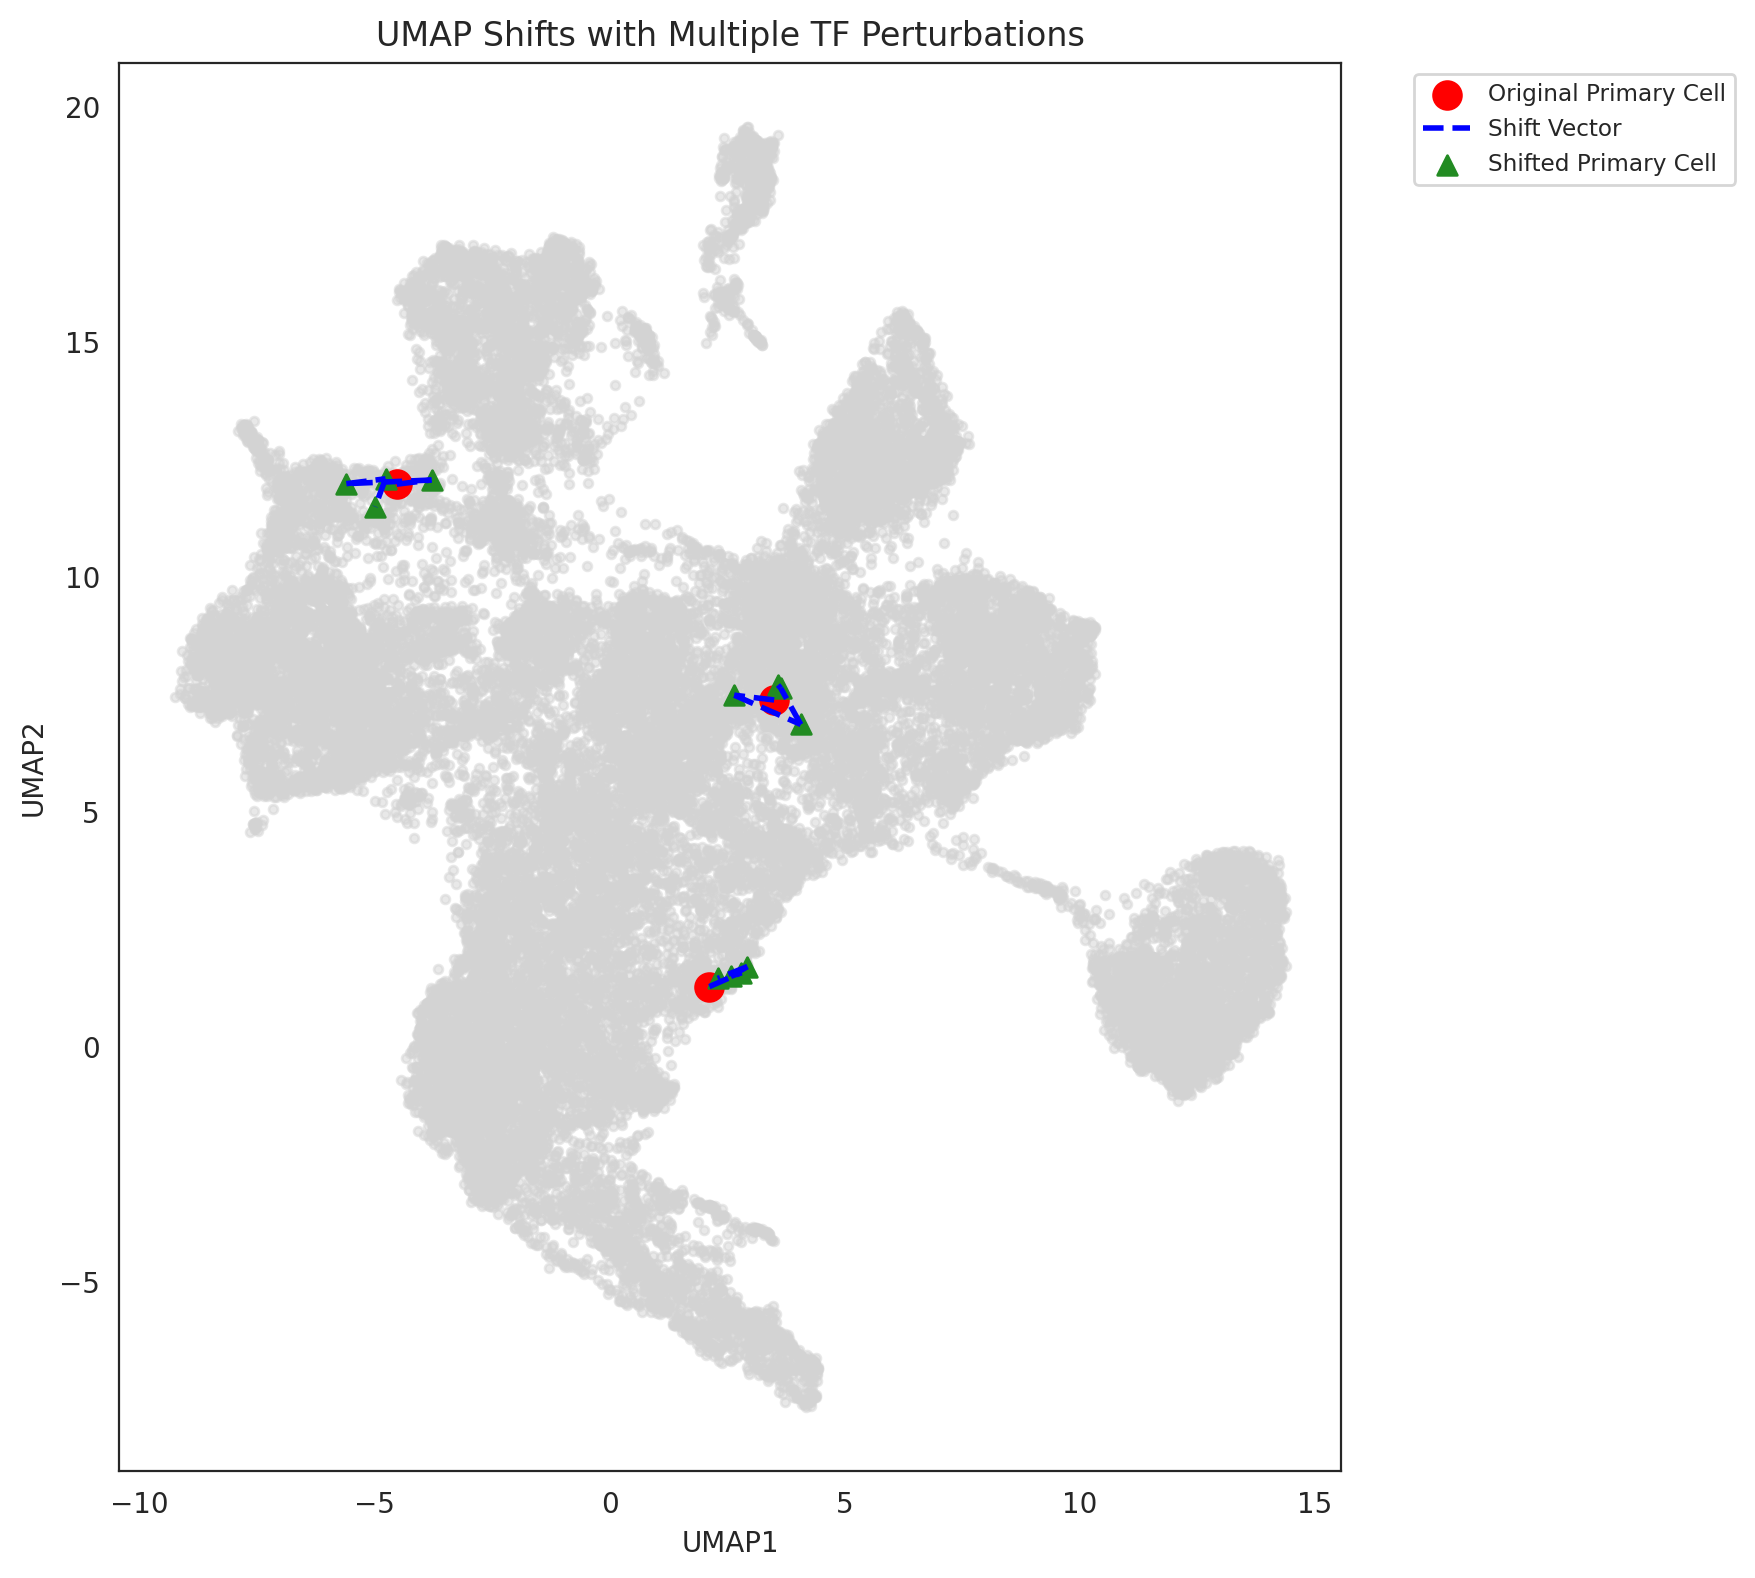

In [29]:
inference_test.batch_perturbation_seq()


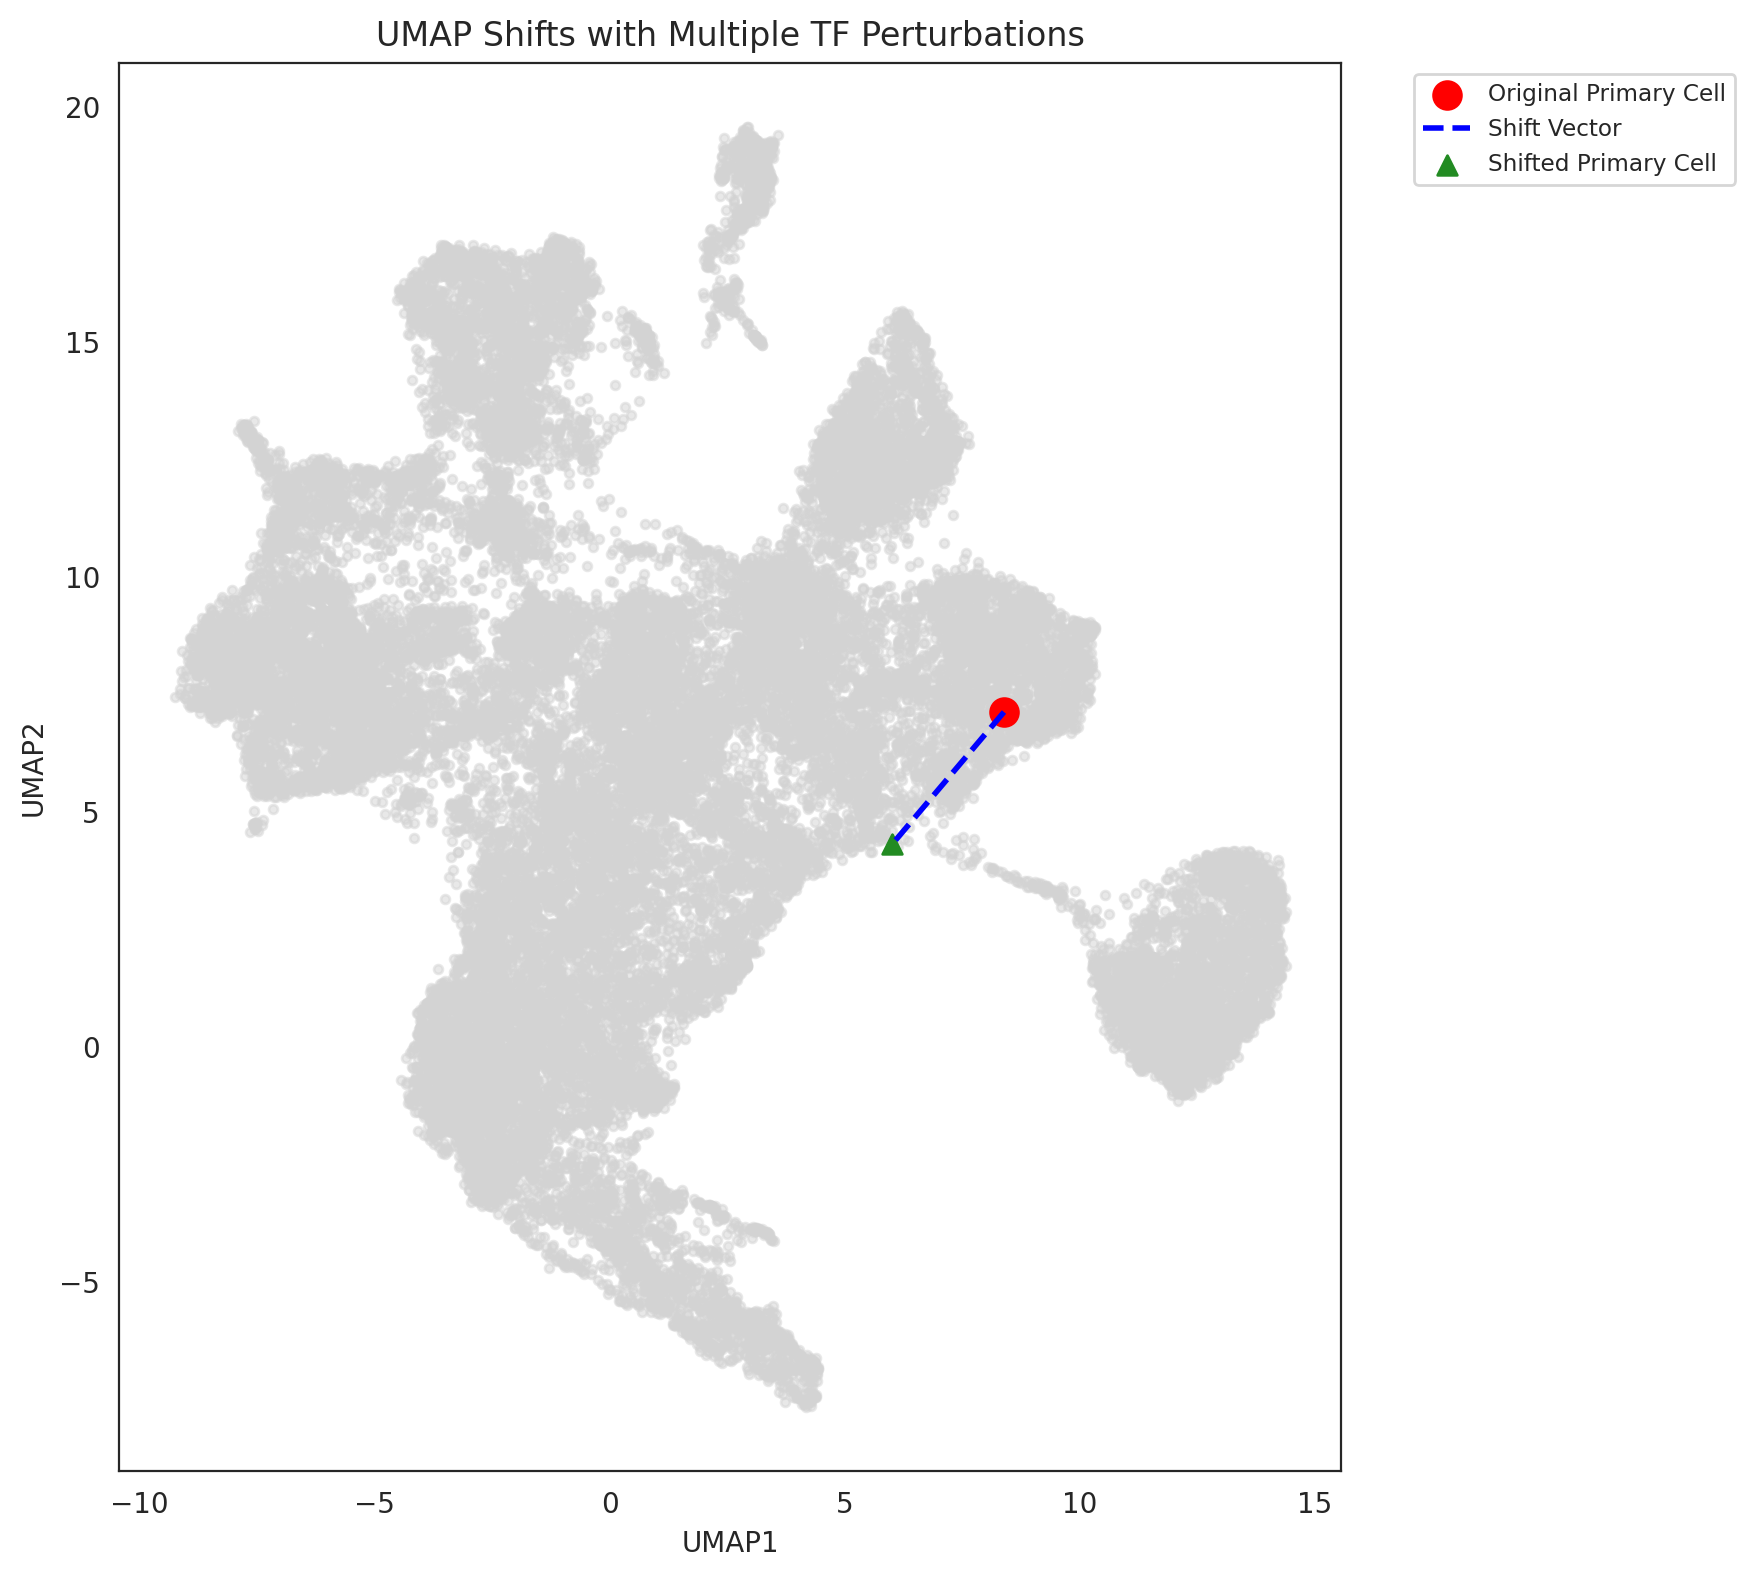

In [97]:
inference_test.do_some_nice_mappings()


In [15]:
non_modified_inference =  inference_module.Inference(oracle_path=os.path.join(CellOracle_Object_Dir_New, "GRN_trained_.celloracle.oracle"), links_path=os.path.join(CellOracle_Object_Dir_New, "filtered_links.celloracle.links"),fit_for_grn_sim=False)
non_modified_inference.precompute()


Oracle object

Meta data
    celloracle version used for instantiation: 0.19.0
    n_cells: 30000
    n_genes: 3000
    cluster_name: celltype
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 44608 genes
    n_regulatory_in_TFdict: 474 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 110 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 3000 genes
    k_for_knn_imputation: 750
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Done

Oracle object

Meta data
    celloracle version used for instantiation: 0.19.0
    n_cells: 30000
    n_genes: 3000
    cluster_name: celltype
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 44608 genes
    n_regulatory_in_TFdict: 474 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 110 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 3000 genes
    k_for_knn_imputation: 750
Status
    Gene expression matrix: 

In [19]:
#modified stuff:
#array([0.99874614, 3.01737445])
#shift:  [-0.15186395 -0.20631105]

#normal stuf
# array([0.99874614, 3.01737445])
# shift:  [-0.15186395 -0.20631105]/
#non_modified_inference.init()
# #print(non_modified_inference.oracle.adata[4943].obs.index)
#non_modified_inference.batch_perturbation()
non_modified_inference.perturb(perturb_condition={"Atf6": 0.0}, propagate=3, calc_prob=True)
# non_modified_inference.perturb(perturb_condition={"Atf6": 0.0}, propagate=3, calc_prob=True)
#non_modified_inference.plot_result_after_trans_prob()
#non_modified_inference.calculate_embedding_coord([])


Simulating perturbation
Current Time = 12:53:17
shape of gem imputed:  (30000, 3000)
Current Time = 12:54:02
difference in time 0:00:45
starting corr
[26391 16805 23781 29374  9899  4030  3316  3439 16432  3190 20883 13673
 11873 13210  7631  3588  1782 19693 12968 26757 17315   174  1925 24983
 29066  8151 19978 10212 15472 11926  8846 29383 25780 13762 26509 26023
  6065  1074 27158 18554  6859  9776  4500 19704 11816  5007 20283  9961
 23190 24028 29366  6684 29392  8216 27381 14958  2562 21580 20311 27091
   775 12864 13804  8611 24412 29935  5367 20865 28940 15089 21214 13473
 23853 28866 12062 24069 28723 10370  8192 26784 14894  3648 22492 15631
 23217 10097  5699 12278 18679 23598  1035 17458 29178  7013 15699 20327
 17818 29633  8994  8294  7628  5915 27172  7959 16922 13033 23963 14191
  4448 22533  8889 28724  6434 16880 11626 19932  9396  7844  5124 19106
 21804 25510  1932  6011 25271 19342 28474  9763  9073 25771 23623  1414
  6209 19909 24006  1277  8617 24063 11562 1728

In [27]:
inference_test.retrieve_other_cells()

525
View of AnnData object with n_obs × n_vars = 525 × 3000
    obs: 'bc_idx', 'colnames', 'obs_names', 'celltype', 'celltype_general'
    var: 'Symbol', 'rownames', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators', 'isin_actve_regulators'
    uns: 'celltype_colors', 'neighbors', 'pca', 'pca_neighbors_sparse', 'umap'
    obsm: 'X_pca', 'X_umap', 'colnames_factor', 'pca_neighbors'
    varm: 'PCs'
    layers: 'chic', 'raw_chich_counts', 'raw_count', 'unspliced_spliced', 'normalized_count', 'imputed_count', 'simulation_input'
    obsp: 'connectivities', 'distances', 'pca_neighbors_sparse'
[73.92054, 62.97602, 67.83958, 63.80716, 65.54874, 77.88346, 68.99902, 68.59787, 70.94011, 71.806076, 72.72664, 61.952145, 59.6395, 76.753845, 66.15446, 69.579285, 70.77777, 71.42686, 64.51792, 68.41019, 71.21321, 66.58729, 74.14122, 73.19804, 75.463486, 67.92303, 67.56355, 67.24492, 89.45244, 63.900623, 67.17497, 70.10141, 69.82683, 62.996815, 82.245605, 60.903374

Cell index:  28459
Gene Gata1 is not in the subset. Skipping perturbation.
GRN_unit:  cluster
doing cluster tiings
unique clusters in neighbors:  2
modified embedding knn:  (51, 51)
modified corrcoef:  (51, 51)
modified embedding:  (51, 500)
nan encountered in coef
shape embedding knn:  (51, 51)
shape corrcoef:  (51, 51)
shape embedding:  (51, 500)
delta done (51, 500)
shape coefficient:  (51, 51)


/home/caspar/miniconda3/envs/cellOracle/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Celltype original cell ExE Endoderm


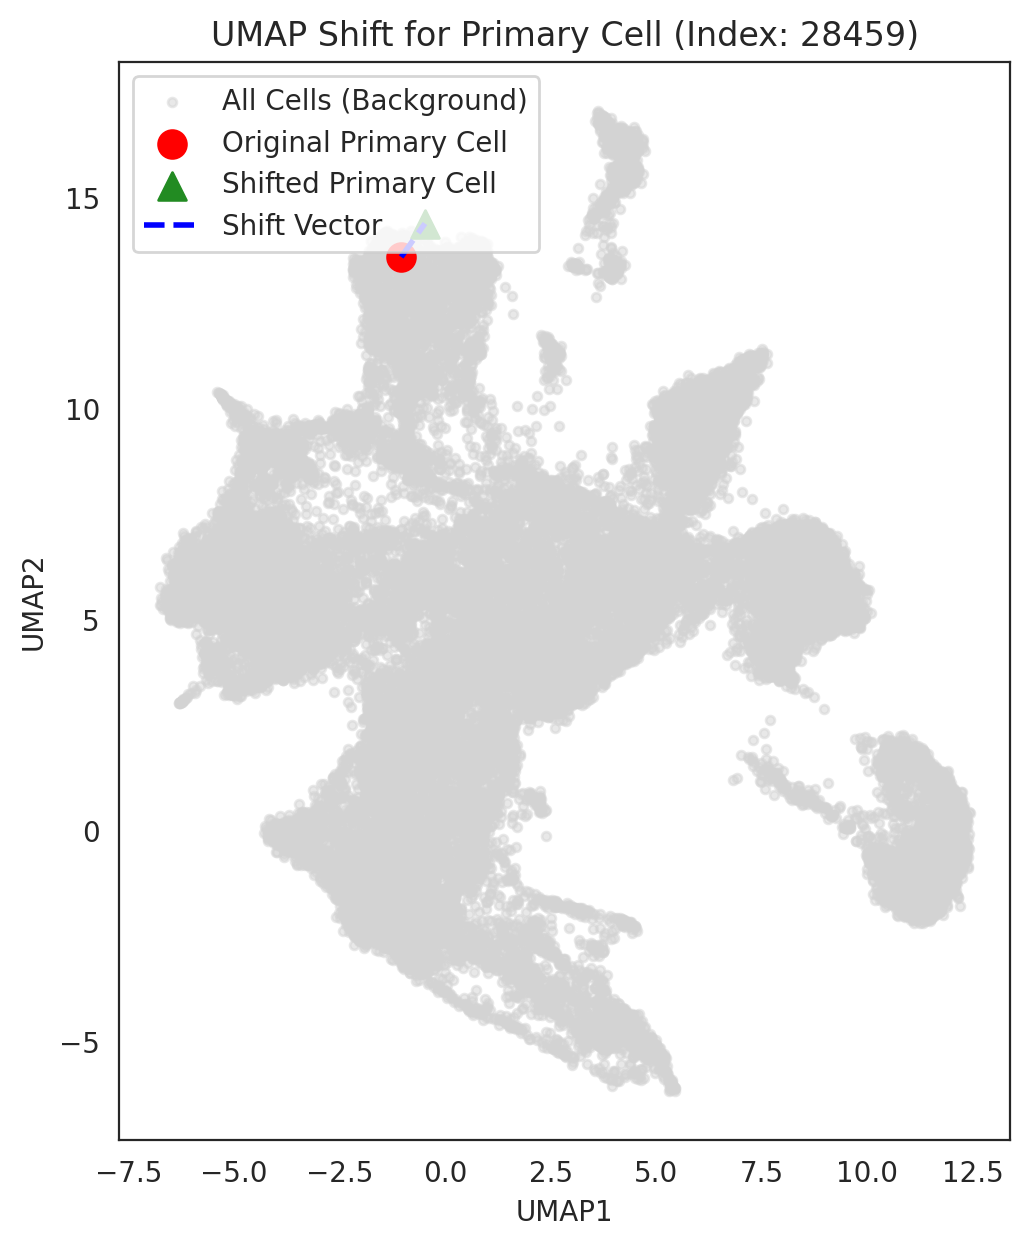

Total distance between original and shifted pca embedding 2.059894126276681e-16


ValueError: PCA KDTree is missing. Cannot compute nearest neighbor.

In [57]:
inference_test.perform_custom_inference_iteration(perturb_condition = {"Gata1":0.0} ,propagate =3, cell_idx=28459)



In [10]:
non_modified_inference =  inference_module.Inference(oracle_path=os.path.join(CellOracle_Object_Dir_New, "GRN_trained.celloracle.oracle"), links_path=os.path.join(CellOracle_Object_Dir_New, "filtered_links.celloracle.links"),fit_for_grn_sim=False)
non_modified_inference.perturb(perturb_condition={"Gata4": 0.0}, propagate=3, calc_prob=True)
# non_modified_inference.plot_result_after_trans_prob()


Oracle object

Meta data
    celloracle version used for instantiation: 0.19.0
    n_cells: 30000
    n_genes: 3000
    cluster_name: celltype
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 44608 genes
    n_regulatory_in_TFdict: 474 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 110 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 3000 genes
    k_for_knn_imputation: 750
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Done

Oracle object

Meta data
    celloracle version used for instantiation: 0.19.0
    n_cells: 30000
    n_genes: 3000
    cluster_name: celltype
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 44608 genes
    n_regulatory_in_TFdict: 474 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 110 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 3000 genes
    k_for_knn_imputation: 750
Status
    Gene expression matrix: 

In [13]:
non_modified_inference_ =  inference_module.Inference(oracle_path=os.path.join(CellOracle_Object_Dir_Actual, "GRN_trained.celloracle.oracle"), links_path=os.path.join(CellOracle_Object_Dir_Actual, "filtered_links.celloracle.links"),fit_for_grn_sim=False)
non_modified_inference_.perturb(perturb_condition={"Gata1": 0.0}, propagate=3, calc_prob=True)

Oracle object

Meta data
    celloracle version used for instantiation: 0.18.0
    n_cells: 30000
    n_genes: 3000
    cluster_name: celltype
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 3000 genes
    n_regulatory_in_TFdict: 474 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 166 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 3000 genes
    k_for_knn_imputation: 750
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Done

Oracle object

Meta data
    celloracle version used for instantiation: 0.18.0
    n_cells: 30000
    n_genes: 3000
    cluster_name: celltype
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 3000 genes
    n_regulatory_in_TFdict: 474 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 166 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 3000 genes
    k_for_knn_imputation: 750
Status
    Gene expression matrix: Re

aranging ix choice
[    0     1     2 ... 29997 29998 29999]
getting colors from colorandum
[[0.35294118 0.         0.02745098 1.        ]
 [0.29019608 0.23137255 0.3254902  1.        ]
 [0.6        0.49019608 0.52941176 1.        ]
 ...
 [0.56078431 0.69019608 1.         1.        ]
 [0.         0.5372549  0.25490196 1.        ]
 [0.56078431 0.69019608 1.         1.        ]]
aranging ix choice
[    0     1     2 ... 29997 29998 29999]
getting colors from colorandum
[[0.35294118 0.         0.02745098 1.        ]
 [0.29019608 0.23137255 0.3254902  1.        ]
 [0.6        0.49019608 0.52941176 1.        ]
 ...
 [0.56078431 0.69019608 1.         1.        ]
 [0.         0.5372549  0.25490196 1.        ]
 [0.56078431 0.69019608 1.         1.        ]]


AttributeError: 'Oracle' object has no attribute 'delta_embedding_random'

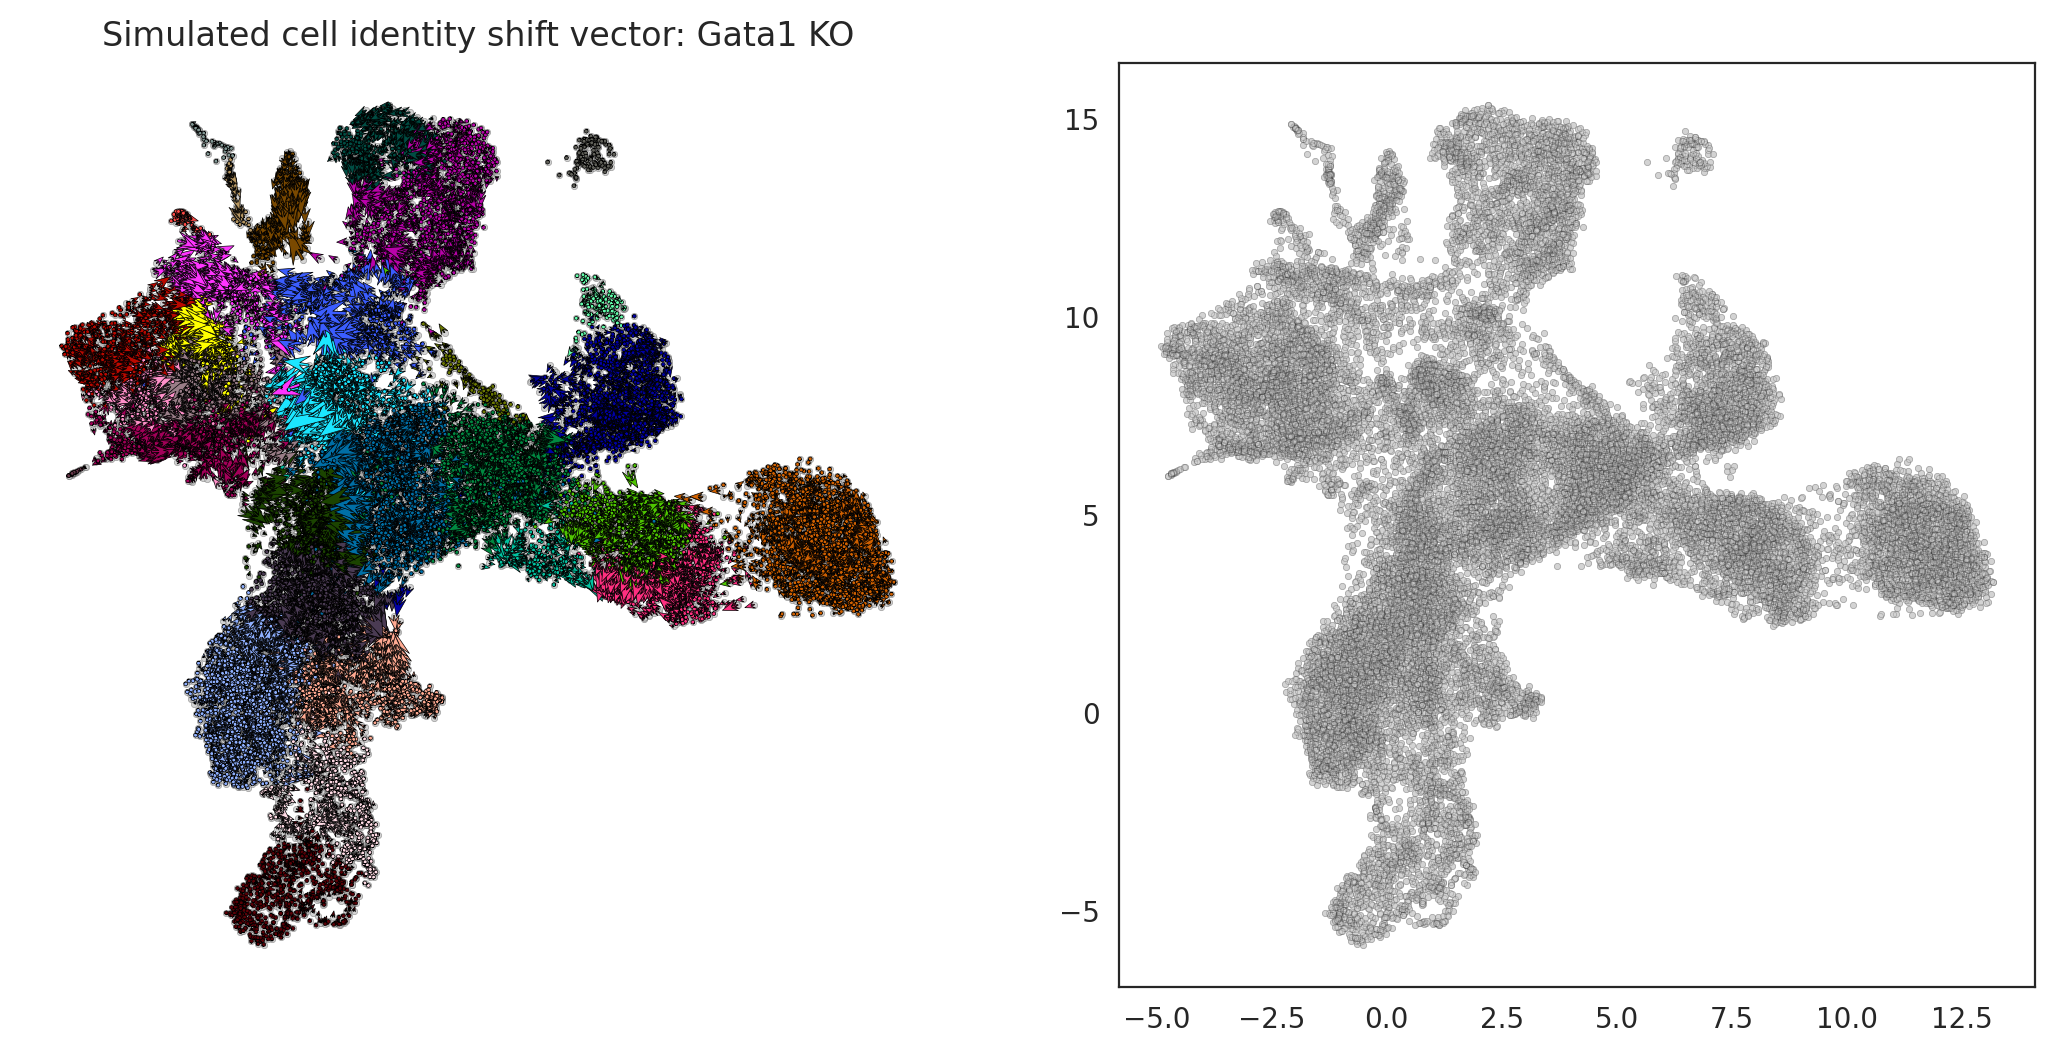

In [21]:
#non_modified_inference_.perturb(perturb_condition={"Gata1": 0.0}, propagate=3, calc_prob=True)
non_modified_inference_.plot_result_after_trans_prob()


In [22]:
# load in necessary data for the pipeline
# print(os.path.exists("../celloracle_data/scrna_final_celloc/V_unspliced_norm_log/trimmed/train_data.h5ad"))
final_SCRNA_data = sc.read_h5ad("../celloracle_data/scrna_final_celloc/V_unspliced_norm_log/trimmed/train_data.h5ad")
test = final_SCRNA_data.obs['celltype'].unique()
for i in test:
    print(i)
base_grn = pd.read_parquet(os.path.join(Base_GRN_Dir, 'base_grn_whole.parquet'))
#check how many 1's there are in the base_grn



# for col in base_grn.columns:
#     print(col, base_grn[col].sum())
# unique_genes = base_grn['gene_short_name'].unique()
# print(len(unique_genes))
# final_SCRNA_data_copy = final_SCRNA_data.copy()
# print(len(final_SCRNA_data_copy.obs["celltype"].unique()))
# base_grn_copy = base_grn.copy()
# print(final_SCRNA_data.shape)
# print(base_grn.shape)
# print(final_SCRNA_data)
# print(base_grn)

Late Motor Neurons
Neural Progenitors
LP/Intermediate Mesoderm
mESCs
NMPs
Endothelium
Reprogramming PGCs
Naive PGCs
Early Motor Neurons
Visceral Endoderm
Pharyngeal Mesoderm
Dermomyotome
Floor Plate Neural Tube
Epiblast
Caudal Epiblast
(pre)Somitic/Wavefront
Caudal Mesoderm
ExE Endoderm
Sclerotome
Nascent Mesoderm
Roof Plate Neural Tube
Cardiac Mesoderm
PGCs
Epidermis Progenitors
Primitive Streak
(early) Somite
Parietal Endoderm
Cardiomyocytes
Megakaryocytes
Erythrocytes
Myotome


In [25]:

# tf_in_data_not_in_base = []
# for tf in final_SCRNA_data.var.index:
#     if tf not in base_grn['gene_short_name']:
#         tf_in_data_not_in_base.append(tf)
tf_colums = base_grn.columns
#drop peak_id and gene_short_name
tf_colums = tf_colums.drop(['peak_id', 'gene_short_name'])
for i in tf_colums:
    print(i)
    

# print(len(tf_colums))
# diff = []
# genes_scrna = final_SCRNA_data.var.index
# for tf in tf_colums:
#     if tf not in genes_scrna:
#         diff.append(tf)
#         
# print(len(diff))
# print(diff)
# 
# 
# print(inference_test.getadata().var.symbol)
# genes = base_grn['gene_short_name'].unique()
# genes_scrna = final_SCRNA_data.var["Symbol"]
# diff = []
# print(len(base_grn['gene_short_name']))
# print(len(genes))
# print(genes)# print("diff")
# for gene in genes:
#     if gene not in genes_scrna:
#         diff.append(gene)
# 
# print(len(diff))
# #print(diff)
# 
# diff_scrna = []
# for gene in genes_scrna:
#     if gene not in genes:
#         diff_scrna.append(gene)
# 
# print(len(diff_scrna))
# 
# # 
# # print(final_SCRNA_data.var.index)
# # print("number of vars in base",len(base_grn['gene_short_name']))
# # print("number of vars in data",len(final_SCRNA_data.var.index))
# # print("len of tfs in base not in data",len(tfs_in_base_not_in_data))
# # print("len of tfs in data not in base",len(tf_in_data_not_in_base))

# 

Gata3
Hsf4
Tlx1
Thrb
Irf1
Jund
Sp2
Tfap2b
Vdr
Hoxa9
E2f3
Esr2
Zfp281
Smad1
Plagl1
Klf15
Tgif2
Smad4
Gmeb2
Glis1
Tcf7l1
Erf
Pax9
Meis3
Homez
Zbtb7a
Tfcp2
Gata4
Bcl6
Hmx3
Stat4
Epas1
Foxj3
Clock
Neurod1
Trp73
Tcf21
Foxq1
Olig3
Crem
Eomes
Etv3
Nrf1
Uncx
Fubp1
Hoxc6
Mafk
Rora
Zic2
Foxm1
Stat1
Pax5
Msx2
Nfix
Etv6
Meis2
Sry
Stat5b
Ets2
Rfx1
Tbx20
Prdm4
Hes7
Nr1d1
Creb3l2
Rfx4
Emx2
Klf6
Spic
Tfe3
Stat2
Pknox1
Runx2
Ebf1
Pou4f1
Sp1
Hoxa11
Arid5b
Prox1
Lhx9
Tbx5
Hoxd3
Yy2
Scrt1
Onecut3
Foxn1
Arnt
Cux1
Hsf1
Gabpa
Meis1
Otx2
En1
Zbtb14
E2f6
Sox1
Onecut2
Ptf1a
Ppard
Hnf1b
Pou2f1
Msc
Irf3
Arid3a
Pgr
Six5
Sox7
Nfib
Klf13
Mga
Elk4
Ar
Foxc2
Nr3c1
Barhl1
Tbx15
Nr1h2
Nr4a2
Tfeb
Gfi1b
Stat3
Pax3
Taf1
Hoxc11
Hoxd9
Etv5
Mybl1
Mycn
Pou6f1
Dbp
Irf2
E2f2
Crx
Zic3
Sox8
Pou4f2
Hoxa13
Bhlha15
Bhlhe23
Arntl
Elf1
Sox18
Pou3f1
Nkx6-1
Nr2e1
Klf16
Nr2e3
Sp8
Nfkb2
Nfe2l2
Barx2
Tbx2
Wt1
Esrrg
Mxi1
Foxj1
Cebpz
Prdm14
Hoxa10
Pou3f3
Fli1
Mtf1
Rara
Hoxd11
Nfya
Irf5
Tbp
Grhl1
Myb
Zbtb33
Egr2
Neurog2
Maf
Neurod2
Egr1
Pax4
Po

In [39]:
test =["Xkr4", "Sox17", "Npbwr1", "St18"]
test2 = ["Xkr4", "Sox17", "Npbwr1", "St18", "Plxna4", 'Sfn', 'Msh6', '1700029H14Rik']
print()



                    peak_id gene_short_name  Rxrg  Nr1i2  Pou3f3  Pax4  Etv5  \
31064  chr1_3212989_3217988            Xkr4     0      0       0     1     0   
31065  chr1_3668499_3673498            Xkr4     0      0       0     1     0   
11034  chr1_4492480_4497479           Sox17     0      0       0     0     0   
20290  chr1_5914399_5919398          Npbwr1     0      0       0     0     0   
20258  chr1_6485281_6490280            St18     1      0       0     0     0   
20259  chr1_6728076_6733075            St18     0      0       0     0     0   
20260  chr1_6734222_6739221            St18     0      0       0     0     0   
20261  chr1_6800791_6805790            St18     0      0       0     0     0   
20262  chr1_6815600_6820599            St18     0      0       0     0     0   
20263  chr1_6825897_6830896            St18     0      0       0     0     0   
20264  chr1_6855341_6860340            St18     0      0       0     0     0   

       Rfx1  Hlf  Foxl1  ...  Olig3  Er

AnnData object with n_obs × n_vars = 30000 × 3000
    obs: 'bc_idx', 'colnames', 'obs_names', 'celltype', 'celltype_general'
    var: 'Symbol', 'rownames'
    uns: 'celltype_colors', 'neighbors', 'pca', 'pca_neighbors_sparse', 'umap'
    obsm: 'X_pca', 'X_umap', 'colnames_factor', 'pca_neighbors'
    varm: 'PCs'
    layers: 'chic', 'raw_chich_counts', 'raw_count', 'unspliced_spliced'
    obsp: 'connectivities', 'distances', 'pca_neighbors_sparse'


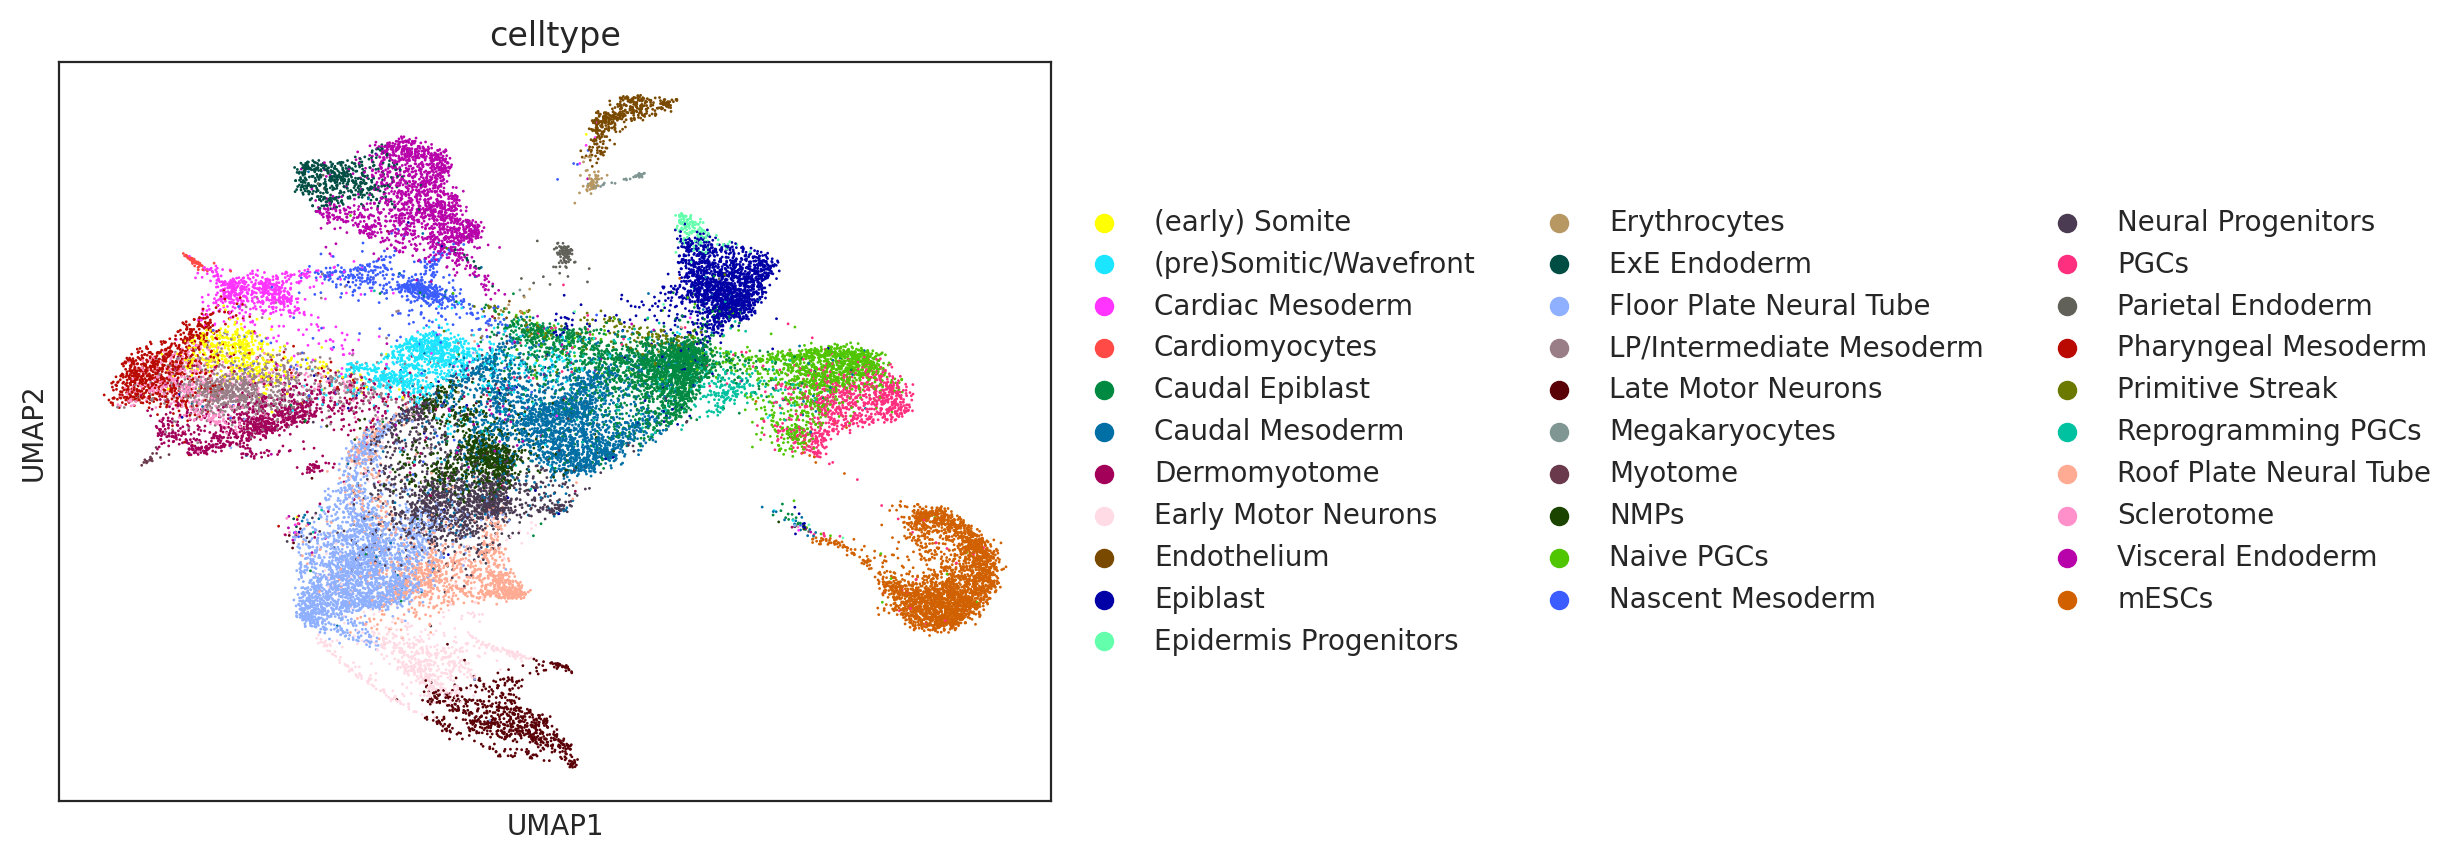

In [13]:
print(final_SCRNA_data_copy)
sc.pl.umap(final_SCRNA_data_copy, color='celltype')

In [46]:
print(final_SCRNA_data_copy.obs['celltype'])
print(final_SCRNA_data_copy.var['Symbol'])
setup = setup_module.Setup(base_grn=base_grn_copy, scRNA_dat=final_SCRNA_data_copy, cluster_name='celltype', embedding_name="X_umap", output_dir=CellOracle_Object_Dir_New, load_dir=CellOracle_Object_Dir_New, load_from_file_cellOc=False, load_from_file_links=False)




2025-02-16 14:01:08,614 - INFO - Creating CellOracle object


obs_names
Gastd7-rep2-H3K27me3-1:CAGTGTCA          Late Motor Neurons
Gastd6-rep2-H3K4me3-5:AGCTTCAC           Neural Progenitors
Gastd5-rep2-H3K27me3-4:TCTGGGCA    LP/Intermediate Mesoderm
mESCs-rep4-H3K27me3-4:CTAGTTCC                        mESCs
Gastd5-rep2-H3K27me3-2:CAGTCCAT                        NMPs
                                             ...           
Gastd7-rep2-H3K4me3-5:AACCCAAC          Pharyngeal Mesoderm
Gastd4-rep3-H3K4me3-9:TAGTTGCG             Primitive Streak
Gastd7-rep3-H3K27me3-5:ATCGTGCA     Floor Plate Neural Tube
Gastd3-rep3-H3K4me3-2:ATACACGG              Caudal Epiblast
Gastd7-rep3-H3K27me3-4:TAAGGTCC     Floor Plate Neural Tube
Name: celltype, Length: 30000, dtype: category
Categories (31, object): ['(early) Somite', '(pre)Somitic/Wavefront', 'Cardiac Mesoderm', 'Cardiomyocytes', ..., 'Roof Plate Neural Tube', 'Sclerotome', 'Visceral Endoderm', 'mESCs']
Symbol
Rnf43      Rnf43
Plxna4    Plxna4
Zcchc7    Zcchc7
Bcl2l1    Bcl2l1
Ttyh2      Ttyh2
        

  0%|          | 0/31 [00:00<?, ?it/s]

Inferring GRN for (early) Somite...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for (pre)Somitic/Wavefront...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Cardiac Mesoderm...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Cardiomyocytes...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Caudal Epiblast...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Caudal Mesoderm...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Dermomyotome...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Early Motor Neurons...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Endothelium...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Epiblast...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Epidermis Progenitors...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Erythrocytes...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for ExE Endoderm...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Floor Plate Neural Tube...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for LP/Intermediate Mesoderm...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Late Motor Neurons...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Megakaryocytes...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Myotome...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for NMPs...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Naive PGCs...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Nascent Mesoderm...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Neural Progenitors...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for PGCs...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Parietal Endoderm...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Pharyngeal Mesoderm...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Primitive Streak...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Reprogramming PGCs...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Roof Plate Neural Tube...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Sclerotome...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for Visceral Endoderm...


  0%|          | 0/3000 [00:00<?, ?it/s]

Inferring GRN for mESCs...


  0%|          | 0/3000 [00:00<?, ?it/s]

links comp done


In [11]:

# path = os.path.join(Base_GRN_Nec_Files_Dir, 'promoter_to_tf_list.csv')
# #promoter set
# promoter_to_tf = pd.read_csv(path, sep='\t')
# copy_promoter_to_tf = promoter_to_tf.copy()

# # #pearson subset before and after subsetting with pearson variance
# pearson_subset = sc.read_h5ad(os.path.join(Base_GRN_Nec_Files_Dir, 'pearson_filtered_genes.h5ad'))
# print(pearson_subset)
# # pre_pearson_subset= sc.read_h5ad(os.path.join(Base_Pre_Process_Dir, 'raw_counts_for_pearson_filter_subset_from_normalized_set.h5ad'))
# # copy_raw_count_subset = pearson_subset.copy()
# pre_pearson_subset_copy = pre_pearson_subset.copy()

#filtered count
# filtered_norm_count = sc.read_h5ad(os.path.join(OG_Files_Data_Dir, 'filtered_and_normalized.h5ad'))
# filtered_norm_count_copy = filtered_norm_count.copy()
#
# scrna_cellOc_data = sc.read_h5ad(os.path.join(Base_SCRNA_cellOcReady_Data, 'normalized_data_with_umap.h5ad'))
# scrna_cellOc_data_copy = scrna_cellOc_data.copy()
#clustering data
# clustering_data = pd.read_csv(os.path.join(Base_Clustering_Data, 'cluster_umap_data.tsv'), sep="\t")
# clustering_data_copy = clustering_data.copy()

#base grn files
# base_grn = pd.read_parquet(os.path.join(Base_GRN_Dir, 'base_grn.parquet'))
# base_grn_unfiltered = pd.read_parquet(os.path.join(Base_GRN_Dir, 'base_grn_unfiltered.parquet'))
# ex_base_grn_ce = pd.read_parquet(os.path.join(Gen_CellOracle_Package_Base_GRN_Data_Dir, 'ce6_TFinfo_dataframe_CisBPv2_fpr2_threshold_10_20210630.parquet'))
# ex_base_grn_tair = pd.read_parquet(os.path.join(Gen_CellOracle_Package_Base_GRN_Data_Dir, 'TAIR10_TFinfo_dataframe_CisBPv2_fpr2_threshold_10_20210630.parquet'))
# ex_base_grn_mm10 =  pd.read_parquet(os.path.join(Gen_CellOracle_Package_Base_GRN_Data_Dir, 'mm10_TFinfo_dataframe_gimmemotifsv5_fpr1_threshold_10_20210630.parquet'))
# ex_base_grn_mm9 = pd.read_parquet(os.path.join(Gen_CellOracle_Package_Base_GRN_Data_Dir, 'mm9_TFinfo_dataframe_gimmemotifsv5_fpr2_threshold_10_20210630.parquet'))
# print(filtered_norm_count.var['Symbol'])
# print(filtered_norm_count.var_names)


KeyboardInterrupt: 

In [52]:
links.to_hdf5(file_path="../../celloracle_data/celloracle_object/links.celloracle.links")

In [ ]:
import CellOracleSetup as setup_module
setup = setup_module.Setup(base_grn=base_grn_copy, scRNA_dat=final_SCRNA_data_copy, load_from_file=False)
links = setup.get_cluster_grns()
links.to_hdf5(file_path="../../celloracle_data/celloracle_object/example_links.celloracle.links")


45
cell number is :2671
Auto-selected k is :66
CellOracle object created, now creating cluster specific grns
This may take a while


  0%|          | 0/24 [00:00<?, ?it/s]

Inferring GRN for Ery_0...


  0%|          | 0/1849 [00:00<?, ?it/s]

In [ ]:
#import modified_celloracle as mco
# example_data = mco.data.load_Paul2015_data()
# example_data.obsm['X_umap'] = example_data.obsm['X_draw_graph_fa']

# # Then plot using sc.pl.umap
# sc.pl.umap(example_data, 
#            color='louvain',  # Replace with the column name you want to color by
#            show=True,
#            frameon=False)
#         # self.example_base_grn= mco.data.load_mouse_scATAC_atlas_base_GRN()
#         # self.example_data.X = self.example_data.layers['raw_count'].copy()
#         # self.celloracle = self._create_cell_oc()
#         # logging.info("data contents of anndata objects")
#         # logging.info(self.example_base_grn.head())
#         # logging.info(pd.DataFrame(self.example_data.X).head())
#         # logging.info(self.base_GRN.head())
#         # logging.info(pd.DataFrame(self.scRNA_dat.X).head())
#         # logging.info(self.example_base_grn)

#         # logging.info("clustering data")
#         # logging.info(self.example_data.obsm['X_draw_graph_fa'])

In [ ]:
# clustering_data = pd.read_csv("/home/vivek/NOBINFBACKUP/projects/mGast_tchic/metadata/marloes_20230622_adata_obs_celltyping.tsv", sep="\t") # 38117 annotated cells here
# #write it to a file
# clustering_data.to_csv(os.path.join(Base_Clustering_Data, 'cluster_umap_data.tsv'), sep="\t", index=False)

In [28]:
# promoter_csv_file = pd.read_csv(os.path.join(Base_GRN_Nec_Files_Dir, 'promoter_to_tf_list.csv'), sep='\t')
# print(promoter_csv_file)
# #get all unique tfs, they are in the colum 'TF_inSwissRegulon' and each value is then a list of tfs after splittin on a space
# tf_set = set()
# print(len(tf_set))
# all_tfs = promoter_csv_file['TF_inSwissRegulon'].str.split(',').explode().str.strip()
# all_tfs = all_tfs[all_tfs != ''].unique()
# print(len(all_tfs))

In [10]:
# base_grn_parquet = pd.read_parquet(os.path.join(Base_GRN_Dir, 'base_grn.parquet'))
# tf_columns_list = [col for col in base_grn_parquet.columns if col not in ['peak_id', 'gene_short_name']]
# #check which column in all_tfs is not in tf_columns_list
# not_in_tf_columns_list = [tf for tf in all_tfs if tf not in tf_columns_list]
# all_tfs = [tf for tf in all_tfs if pd.notna(tf)]
# print(len(tf_columns_list))
# print(len(all_tfs))
# print(not_in_tf_columns_list)

474
474
[nan]


Gene
ENSMUSG00000021716    Srek1ip1
ENSMUSG00000034867     Ankrd27
ENSMUSG00000034177       Rnf43
ENSMUSG00000025785      Exosc7
ENSMUSG00000050700     Emilin3
                        ...   
ENSMUSG00000035694       Caps2
ENSMUSG00000100113     Gm28592
ENSMUSG00000046691       Chtf8
ENSMUSG00000032041       Tirap
ENSMUSG00000050721     Plekho2
Name: Symbol, Length: 18311, dtype: category
Categories (18306, object): ['0610005C13Rik', '0610009E02Rik', '0610010F05Rik', '0610010K14Rik', ..., 'Zzef1', 'Zzz3', 'a', 'ccdc198']
Index(['ENSMUSG00000021716', 'ENSMUSG00000034867', 'ENSMUSG00000034177',
       'ENSMUSG00000025785', 'ENSMUSG00000050700', 'ENSMUSG00000029765',
       'ENSMUSG00000047281', 'ENSMUSG00000035649', 'ENSMUSG00000087109',
       'ENSMUSG00000029179',
       ...
       'ENSMUSG00000113425', 'ENSMUSG00000039065', 'ENSMUSG00000085622',
       'ENSMUSG00000069727', 'ENSMUSG00000097077', 'ENSMUSG00000035694',
       'ENSMUSG00000100113', 'ENSMUSG00000046691', 'ENSMUSG0000003204

In [8]:
# Get the genes included in pearson_subset_copy
# genes_to_keep = copy_raw_count_subset.var_names
# 
# # Subset the larger dataset using boolean indexing
# subset_anndata = filtered_norm_count_copy[:, filtered_norm_count_copy.var_names.isin(genes_to_keep)]
# print(subset_anndata.shape)
# #save anndata file 
# subset_anndata.write(os.path.join(Base_GRN_Dir, 'data_to_create_cluster_specific_grn.h5ad'))

(35223, 4000)


In [42]:
import ConvertPromoterToTFListToBaseGRN as converter_module
path = os.path.join(Base_GRN_Nec_Files_Dir, 'promoter_to_tf_list.csv')
#promoter set
#set type to string
promoter_to_tf = pd.read_csv(path, sep='\t')
copy_promoter_to_tf = promoter_to_tf.copy()
convert_promoter_to_TF_list_to_base_GRN = converter_module.Converter(initial_promoter_gene_list=copy_promoter_to_tf, pearson_values=final_SCRNA_data_copy, output_dir=os.path.join(Base_GRN_Dir, 'base_grn_whole.parquet'))
convert_promoter_to_TF_list_to_base_GRN.create_base_grn()


2025-02-16 13:55:18,939 - INFO - Creating gene column from promoter column
2025-02-16 13:55:18,998 - INFO - Created gene column from promoter column
2025-02-16 13:55:18,999 - INFO - subsetting the initial promoter gene list
2025-02-16 13:55:19,000 - INFO - Subsetting the initial promoter gene list with original length: (65551, 10)
2025-02-16 13:55:19,001 - INFO - Subsetting the initial promoter gene list with new length: (65551, 10)
2025-02-16 13:55:19,001 - INFO - Creating peak id column in promoter dataset
2025-02-16 13:55:19,065 - INFO - Created peak id column in promoter dataset
2025-02-16 13:55:19,066 - INFO - Creating a set of TFs from the promoter column


0                 P_1:Gnai3:1
1                  P_2:Pbsn:1
2                 P_3:Cdc45:1
3                   P_4:H19:1
4                 P_5:Scml2:1
                 ...         
65550    P_75077:BX571804.1:1
65551    P_75079:AC154773.1:1
65552    P_75080:AL662853.1:1
65553    P_75081:AC145556.1:1
65554    P_75082:CT868734.1:1
Name: name, Length: 65551, dtype: object


2025-02-16 13:55:19,321 - INFO - Created a set of TFs from the promoter column with size: 474
2025-02-16 13:55:19,322 - INFO - Creating a dictionary with peak id as keys and the values are lists of TFs
2025-02-16 13:55:22,469 - INFO - Created a dictionary with peak id as keys and the values are lists of TFs
2025-02-16 13:55:22,666 - INFO - Filling the base grn
2025-02-16 13:55:43,134 - INFO - Filled the base grn with shape: (65551, 476)
2025-02-16 13:55:43,140 - INFO - Sample of base grn: 
                    peak_id gene_short_name  Gata3  Hsf4  Tlx1  Thrb  Irf1  \
52857  chr1_3071253_3076252   4933401J01Rik      0     0     0     0     0   
31064  chr1_3212989_3217988            Xkr4      0     0     0     0     0   
52964  chr1_3250757_3255756         Gm18956      0     0     0     0     0   
45561  chr1_3464587_3469586          Gm1992      0     0     0     0     0   
53172  chr1_3529795_3534794          Gm7341      0     0     0     0     0   

       Jund  Sp2  Tfap2b  ...  Usf2 

In [12]:
# import pip
# import subprocess
# # Method 1: Using subprocess 
# cellOraclePath =Gen_CellOracle_Package_Dir 
# print(os.path.exists(cellOraclePath))
# subprocess.check_call(['pip', 'install', '-e', cellOraclePath]) 
# # Method 2: Using pip programmatically 
# pip.main(['install', '-e', cellOraclePath])

In [10]:
import pkg_resources

# Get all installed packages and their versions
installed_packages = [(d.project_name, d.version) for d in pkg_resources.working_set]

# Print in a more readable format
for package, version in installed_packages:
    print(f"{package}=={version}")

Cython==3.0.11
HTSeq==2.0.9
MarkupSafe==3.0.1
PyYAML==6.0.2
Send2Trash==1.8.3
XlsxWriter==3.2.0
anndata==0.10.8
anyio==4.6.2.post1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-api-compat==1.9
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
biofluff==3.0.4
biopython==1.84
biothings-client==0.3.1
bleach==6.1.0
celloracle==0.18.0
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.4.0
click==8.1.7
colorama==0.4.6
comm==0.2.2
configparser==7.1.0
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.7
decorator==5.1.1
defusedxml==0.7.1
diskcache==5.6.3
docopt==0.6.2
et-xmlfile==1.1.0
exceptiongroup==1.2.2
executing==2.1.0
fastjsonschema==2.20.0
feather-format==0.4.1
filelock==3.16.1
fonttools==4.54.1
fqdn==1.5.1
ftpretty==0.4.0
genomepy==0.16.1
gimmemotifs==0.17.2
goatools==1.4.12
h11==0.14.0
h5py==3.12.1
httpcore==1.0.6
httpx==0.27.2
idna==3.10
igraph==0.11.6
importlib-metadata==8.5.0
ipykernel==6.29.5
ipython==8.28.0
ipyw

In [35]:
# import CheckSelfMadeBaseGRNAndCompare as checker_module
# 
# #create a list of all the base_grn files to compare
# examples = [ex_base_grn_ce, ex_base_grn_tair, ex_base_grn_mm10, ex_base_grn_mm9]
# custom = [base_grn, base_grn_unfiltered]
# comparison_that_are_made_base =['pearson_filtered_genes', 'unfiltered_genes']
# comparison_that_are_made_ex = ['ce6', 'tair10', 'mm10', 'mm9']
# 
# 
# for i,custom_base_grn in enumerate(custom):
#     base_name = comparison_that_are_made_base[i]
#     for k,example in enumerate(examples):
#         ex_name = comparison_that_are_made_ex[k]
#         logging.info(f"Comparing {base_name} to {ex_name}")
#         checker_module.CompareExampleBaseGRNToCustomMadeGRN.compare_grn(custom_grn=custom_base_grn, ex_base_grn=example)


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x77fd557b14e0>>
Traceback (most recent call last):
  File "/home/caspar/miniconda3/envs/cellOracle/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

Setting up CellOracle with base GRN and scRNA data with base grn:                      peak_id gene_short_name  cenpb  tead1  rbpj  nr2f6  lhx2  \
31064  chr1_3212989_3217988            Xkr4      0      0     0      0     0   
31065  chr1_3668499_3673498            Xkr4      0      0     0      0     0   
11034  chr1_4492480_4497479           Sox17      0      0     0      0     0   
43674  chr1_4968857_4973856         Gm16041      0      0     0      0     0   
20290  chr1_5914399_5919398          Npbwr1      0      0     0      0     0   
...                     ...             ...    ...    ...   ...    ...   ...   
36550  chrY_1134182_1139181             Uty      0      0     0      0     0   
36551  chrY_1166187_1171186             Uty      0      0     0      0     0   
36552  chrY_1242614_1247613             Uty      0      0     0      0     0   
36694  chrY_1261746_1266745           Ddx3y      0      0     0      0     0   
36695  chrY_1283606_1288605           Ddx3y      0      0     0      0     0   

       stat4  klf6  sp2  ...  maff  elf1  pou4f3  spic  hoxb13  hes5  egr4  \
31064      0     0    0  ...     0     0       0     0       0     0     0   
31065      0     0    0  ...     0     0       0     0       0     0     0   
11034      0     0    0  ...     0     0       0     0       0     0     1   
43674      1     0    0  ...     0     0       0     0       0     0     0   
20290      0     0    0  ...     0     0       0     0       0     0     0   
...      ...   ...  ...  ...   ...   ...     ...   ...     ...   ...   ...   
36550      0     0    0  ...     0     0       0     0       0     0     0   
36551      1     0    0  ...     0     0       0     0       0     0     0   
36552      0     0    0  ...     0     0       0     0       0     0     0   
36694      1     0    0  ...     0     0       0     0       0     0     0   
36695      0     0    0  ...     0     0       0     0       0     0     0   

       emx1  tbx3  lhx8  
31064     0     0     0  
31065     0     0     0  
11034     0     0     0  
43674     0     0     0  
20290     0     0     0  
...     ...   ...   ...  
36550     0     0     0  
36551     0     0     0  
36552     0     0     0  
36694     0     0     0  
36695     0     0     0  

[8270 rows x 476 columns]

Creating CellOracle object

ValueError: Please import scRNA-seq data first.